# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [3]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [26]:
def distance(p1,p2):
    diffx=(p1[0]-p2[0])**2
    diffy=(p1[1]-p2[1])**2
    diff=np.sqrt(diffx+diffy)
    return diff

In [27]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here # 
    rows, cols = (len(Data_points), len(Cluster_Centroids))
    Cluster_Distance=np.zeros((rows,cols))
    for i in range(len(Cluster_Centroids)):
        for count in range(len(Data_points)):
            Cluster_Distance[count,i]=distance(Cluster_Centroids[i],Data_points[count])
            count=count+1
           
    return Cluster_Distance 


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [28]:
def Update_centroids(Cluster_assingments,num_of_clusters,Data_points,prev_centroids):
    updated_centroids=[]
    for c in range(num_of_clusters):
        temp=[]
        #temp=np.array(temp)
        count=0
        for d in Cluster_assingments:
            if d[0]==c:
               temp.append(Data_points[count])
              
            count+=1

        if len(temp)==0:
            updated_centroids.append(prev_centroids[c])
            
        else:   
            temp=np.array(temp)       
             
            new_centroid=np.mean(temp,axis=0)
            #print(new_centroid)
            updated_centroids.append(new_centroid)
            #print('new')
                
    updated_centroids=np.array(updated_centroids)

    return updated_centroids

In [29]:
def Cluster_assign(distances):
    cluster_assignments=[]
    for row in distances:
        min_distance_indices = np.where(row == np.min(row))[0]
        if len(min_distance_indices) == 1:
            nearest_cluster_index=min_distance_indices
           
        else:
            # If multiple clusters have the same distance, choose the one with the fewest points
            cluster_counts = [cluster_assignments.count(i) for i in min_distance_indices]
            nearest_cluster_index = min_distance_indices[np.argmin(cluster_counts)]
        cluster_assignments.append(nearest_cluster_index)
    return cluster_assignments


In [30]:
def initialize_centroids(data_points, k):
    min_values = np.min(data_points, axis=0)
    max_values = np.max(data_points, axis=0)
    centroids = []
    for _ in range(k):
        centroid = [np.random.uniform(min_val, max_val) for min_val, max_val in zip(min_values, max_values)]
        centroids.append(centroid)
    return np.array(centroids)

In [31]:
c=np.array([[1,1],[2,3]])
a=np.array([[2,1],[3,4],[3,6],[1,5]])
rows, cols = (len(a), len(c))
Cluster_Distance=[[0]*cols]*rows
clust=GUC_Distance(c,a,1)
ca=Cluster_assign(clust)

In [68]:
def calculate_cluster_metric(Data_points, cluster_assignments, Cluster_Centroids):
    distortion = 0
    for point_index, cluster_index in enumerate(cluster_assignments):
        point = Data_points[point_index]
        centroid = Cluster_Centroids[cluster_index[0]]
        squared_error = sum((point[dim] - centroid[dim])**2 for dim in range(len(point)))
        distortion += squared_error
    return distortion

In [33]:
def calculate_cluster_distances(cluster_distance, cluster_assignments):
    num_clusters = cluster_distance.shape[1]
    cluster_distances = np.zeros(num_clusters)

    for i in range(len(cluster_assignments)):
        cluster_idx = cluster_assignments[i]
        cluster_distances[cluster_idx] += np.sum(cluster_distance[i])

    return sum(cluster_distances)

In [34]:
da=calculate_cluster_metric(a,ca,c)
da

15.62511840008253

In [35]:
temp=[]
temp.append(a[0])
temp.append(a[3])

e=np.mean(temp,axis=0)
e

array([1.5, 3. ])

In [36]:
for i, j in enumerate(ca):
    print(i)
    print(j)

0
[0]
1
[1]
2
[1]
3
[1]


In [83]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
    num_trials=1
    best_final_distance = float('inf')
    best_cluster_metric = float('inf')
    best_centroids = None
    for _ in range(num_trials):

        Cluster_Centroids = initialize_centroids(Data_points, Number_of_Clusters)
       
        num_points = len(Data_points)
        max_iterations = 15
        epsilon = 1e-4 
        for l in range(max_iterations):
           clust_distances=GUC_Distance(Cluster_Centroids,Data_points,1)
           clust_assign=Cluster_assign(clust_distances)
           prev_centroids = np.copy(Cluster_Centroids)
           updated_centroids = Update_centroids(clust_assign, Number_of_Clusters,Data_points, prev_centroids)
           change = np.linalg.norm(updated_centroids - prev_centroids)
           Final_Cluster_Distance = calculate_cluster_distances(clust_distances, clust_assign)
           cluster_Metric = calculate_cluster_metric(Data_points, clust_assign, Cluster_Centroids)
           Cluster_Centroids = updated_centroids
           change=np.linalg.norm(Cluster_Centroids-prev_centroids)
          
           if change<epsilon:
               break
        if Final_Cluster_Distance < best_final_distance:
            best_final_distance = Final_Cluster_Distance
            best_cluster_metric = cluster_Metric
            best_centroids = np.copy(prev_centroids)
            
    plot_clusters(Data_points, clust_assign,Number_of_Clusters,best_centroids)
    return best_final_distance, best_cluster_metric   

    #plot_clusters(Data_points, cluster_assignments, best_centroids)
    

In [80]:


def plot_clusters(data_points, cluster_assignments,K,centroids=None):
    unique_clusters = list(range(0,K))
    num_unique_clusters = K
    colors = plt.cm.viridis(np.linspace(0, 1, num_unique_clusters))  # Use a different colormap with more colors

    for cluster_id, color in zip(unique_clusters, colors):
        cluster_points = data_points[np.ravel(cluster_assignments) == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=color, label=f'Cluster {cluster_id}')

        if centroids is not None:
            centroid = centroids[cluster_id]
            plt.scatter(centroid[0], centroid[1], color=color, marker='x', s=100)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clustering Results')

    # Add centroid labels to the legend
    if centroids is not None:
        for cluster_id, centroid in enumerate(centroids):
            color = colors[cluster_id % num_unique_clusters]  # Use modulo operator for cycling colors
            plt.scatter([], [], color=color, marker='x', s=100, label=f'Centroid {cluster_id}')

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot

    plt.show()

In [39]:
y=list(range(0,6))
y

[0, 1, 2, 3, 4, 5]

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [40]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [41]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

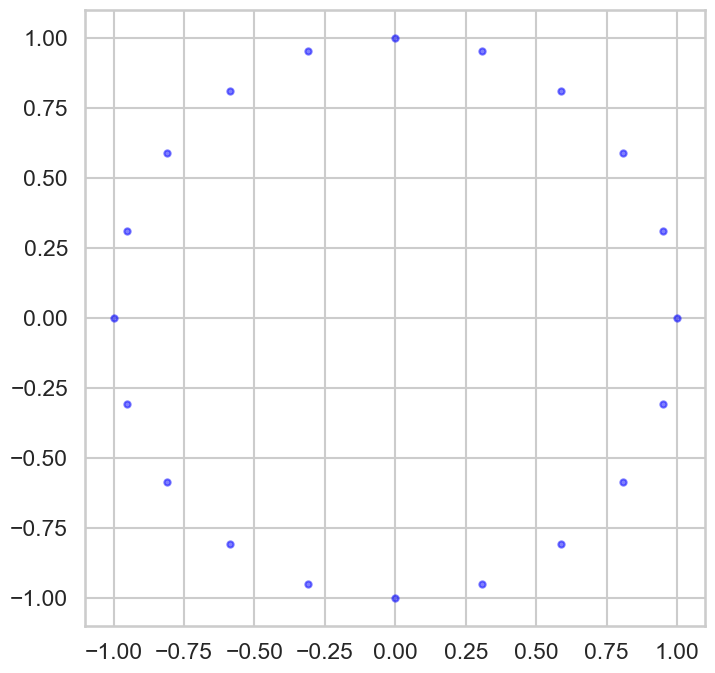

In [42]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

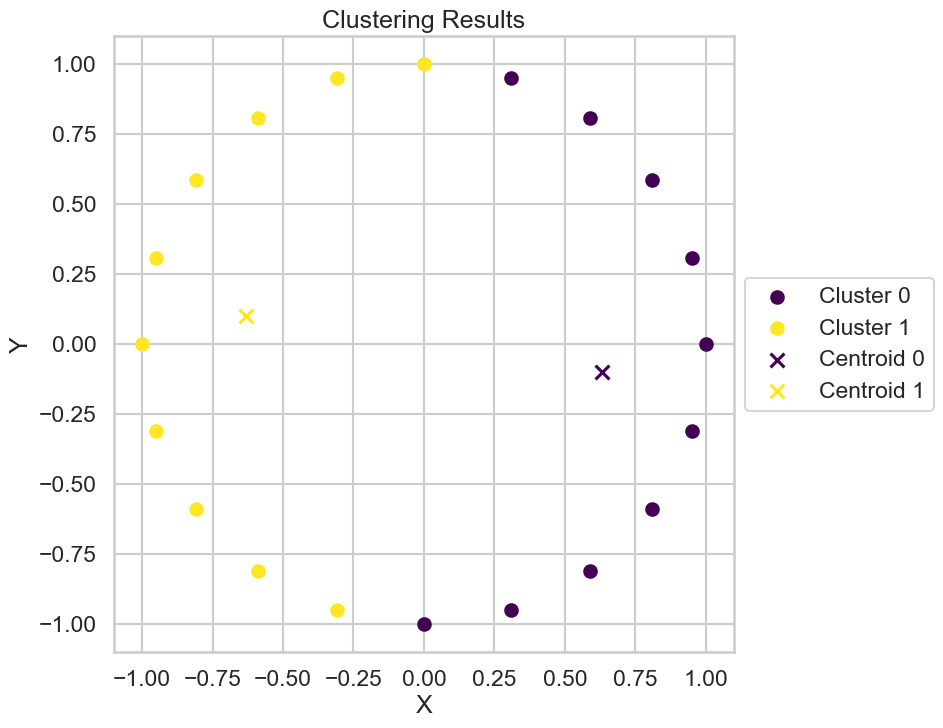

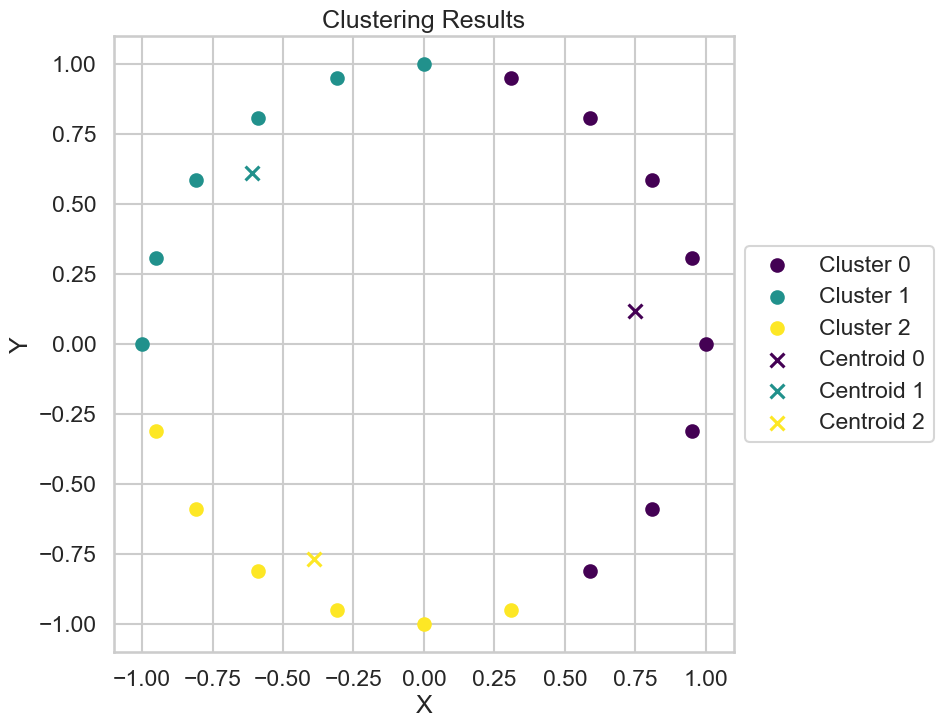

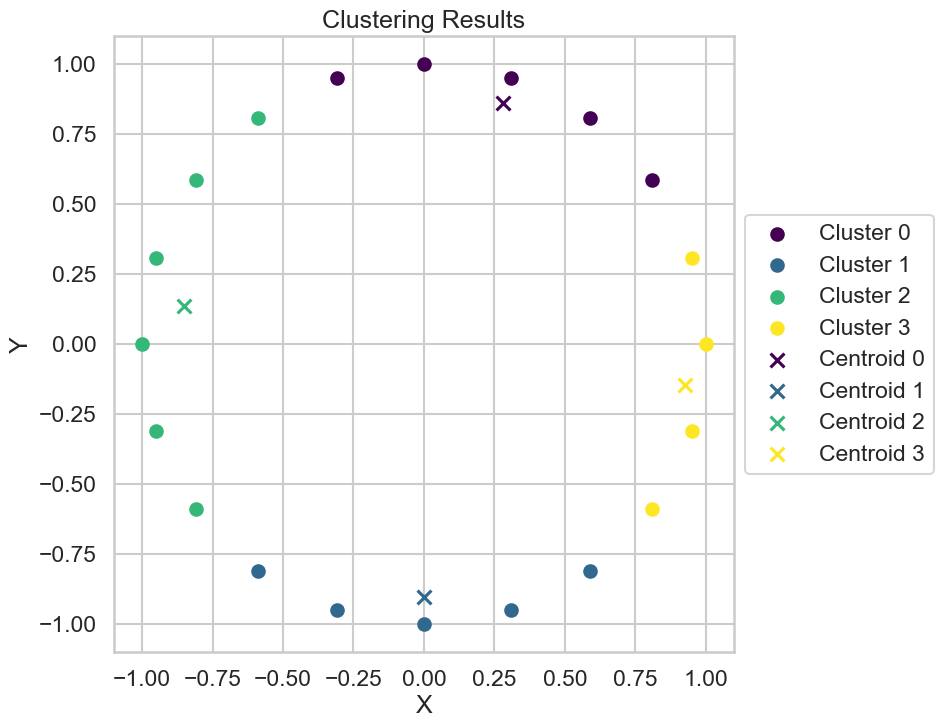

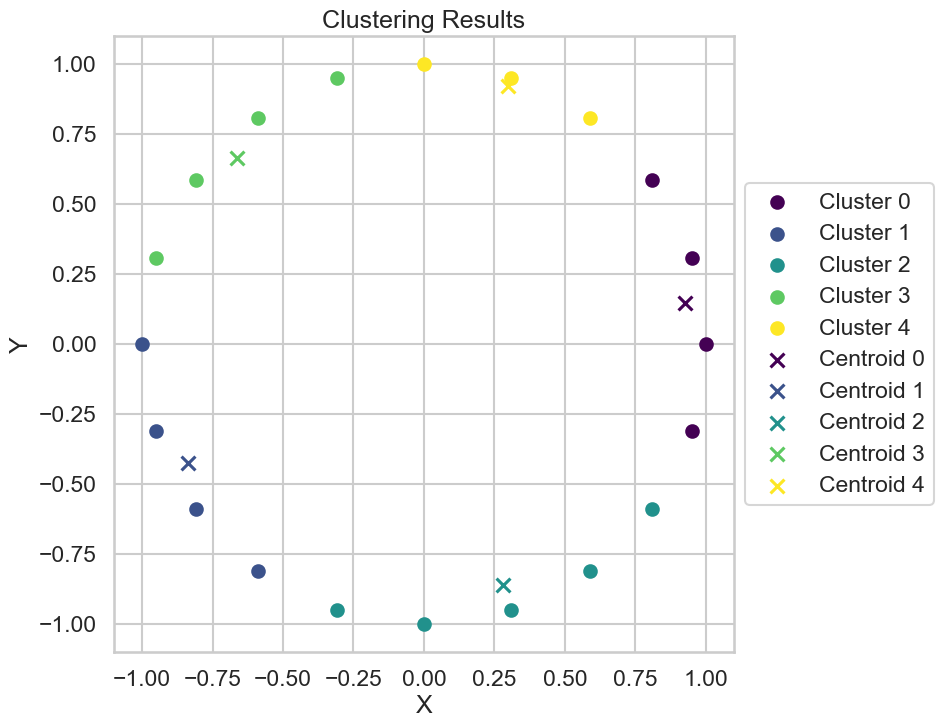

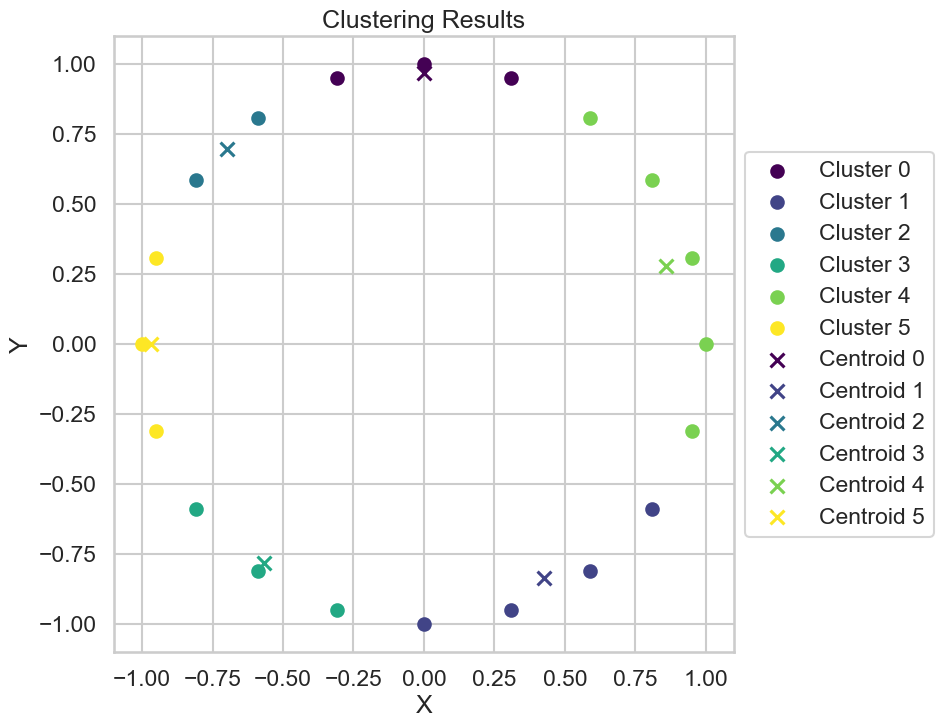

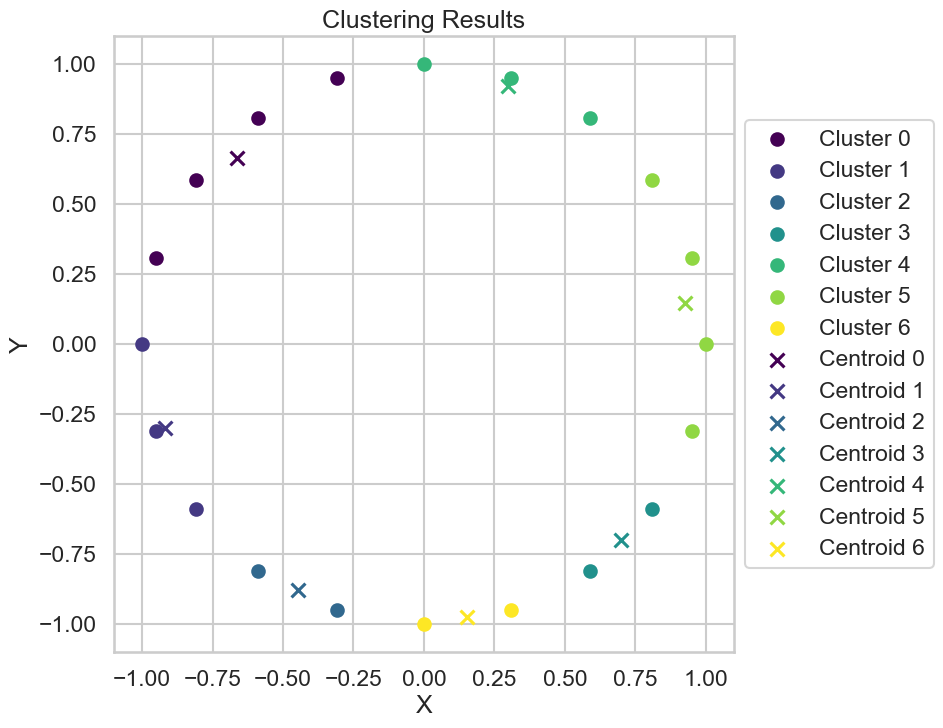

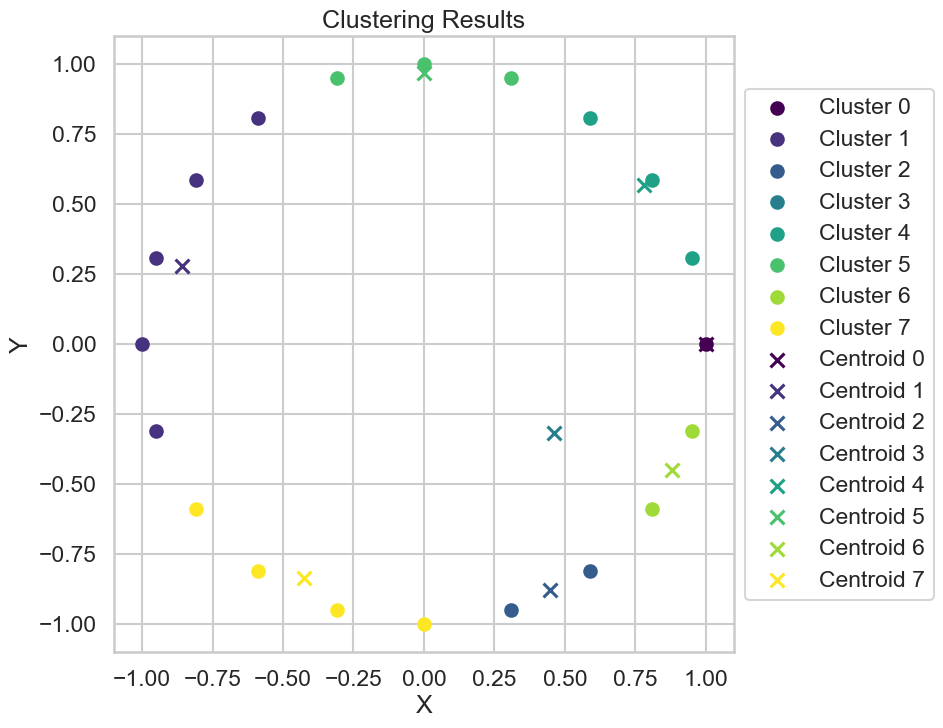

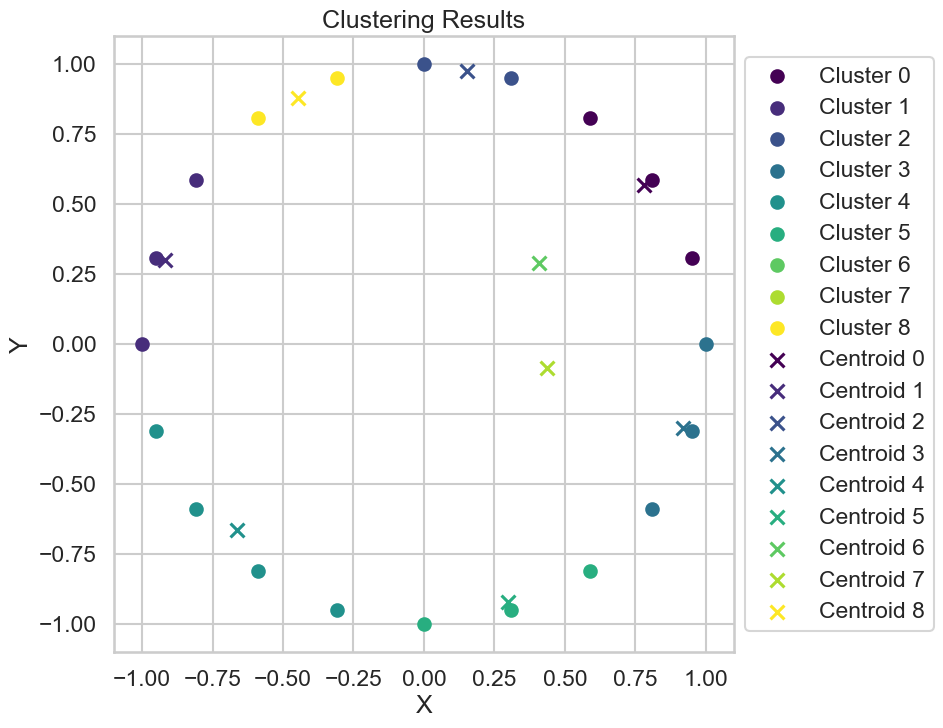

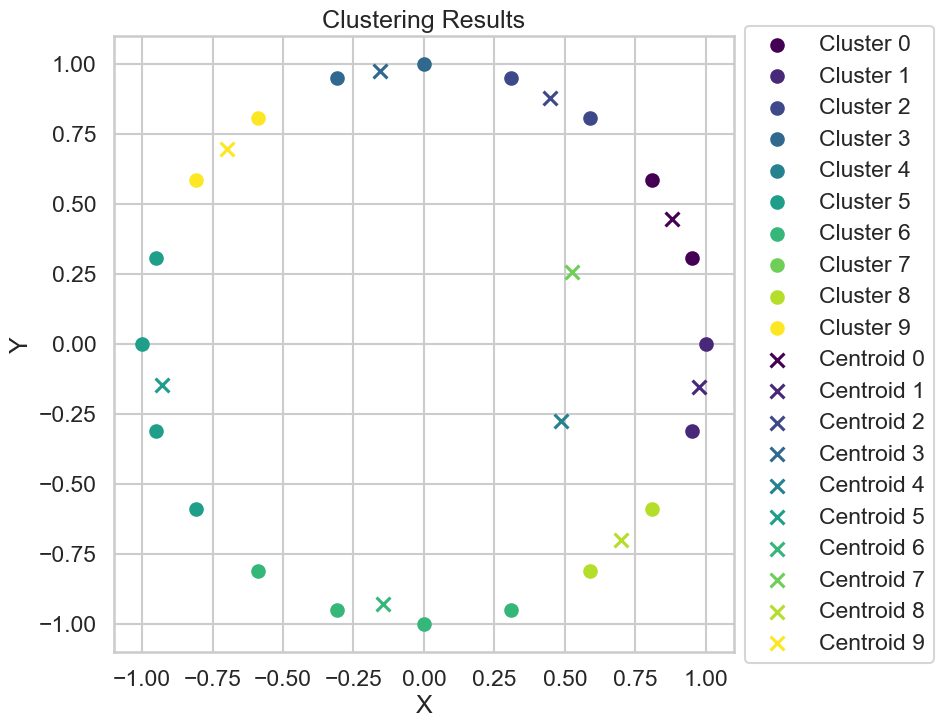

244.88028783651677

In [84]:
Data_points = X

#num_clusters_range = list(range(2, 3))
cluster_metrics = []
Distance_Type ='Euclidean'
for Number_of_Clusters in num_clusters_range:
    Final_Cluster_Distancee,Cluster_Metrics = GUC_Kmean(X, Number_of_Clusters, Distance_Type)
    cluster_metrics.append(Cluster_Metrics)
Final_Cluster_Distancee

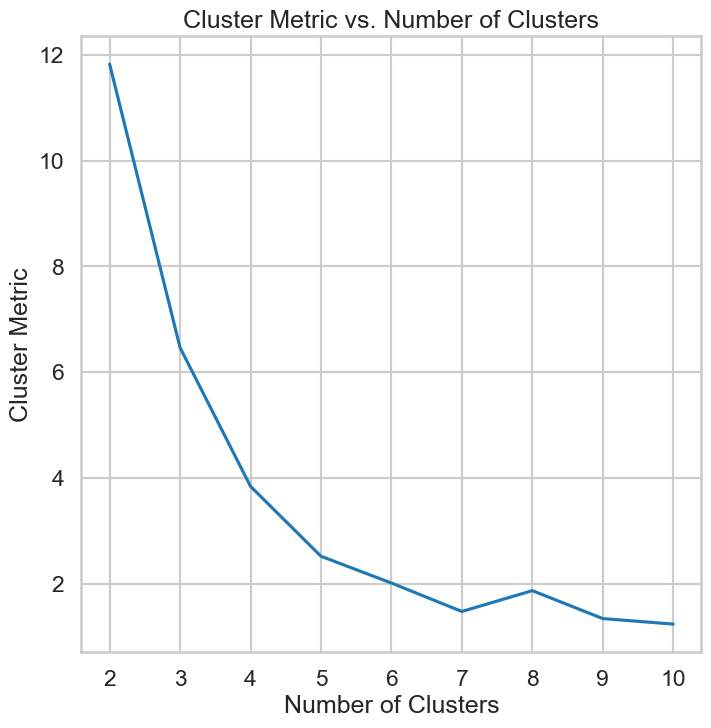

In [85]:
plt.plot(num_clusters_range, cluster_metrics)
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. Number of Clusters')
plt.show()

> #### 2.3. Example 2 : Multi blob Data Gen and display 

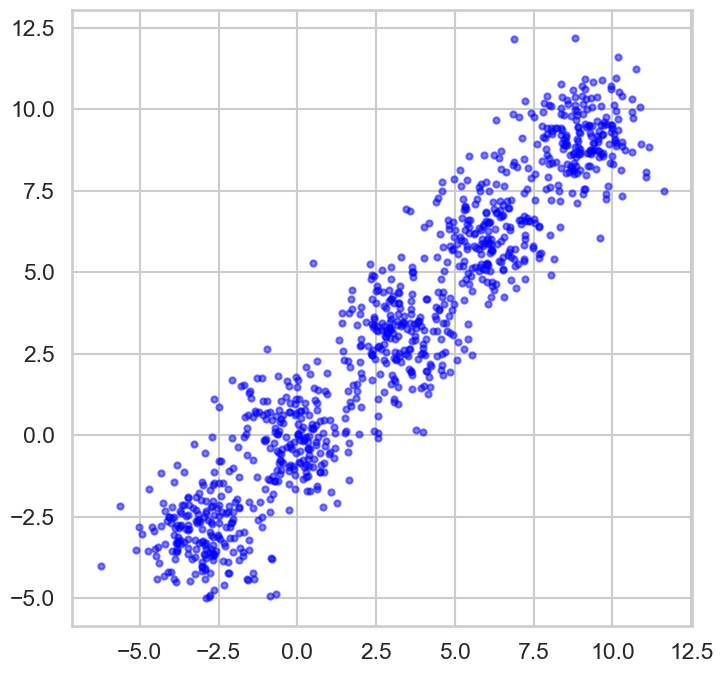

In [45]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
Z, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Z)

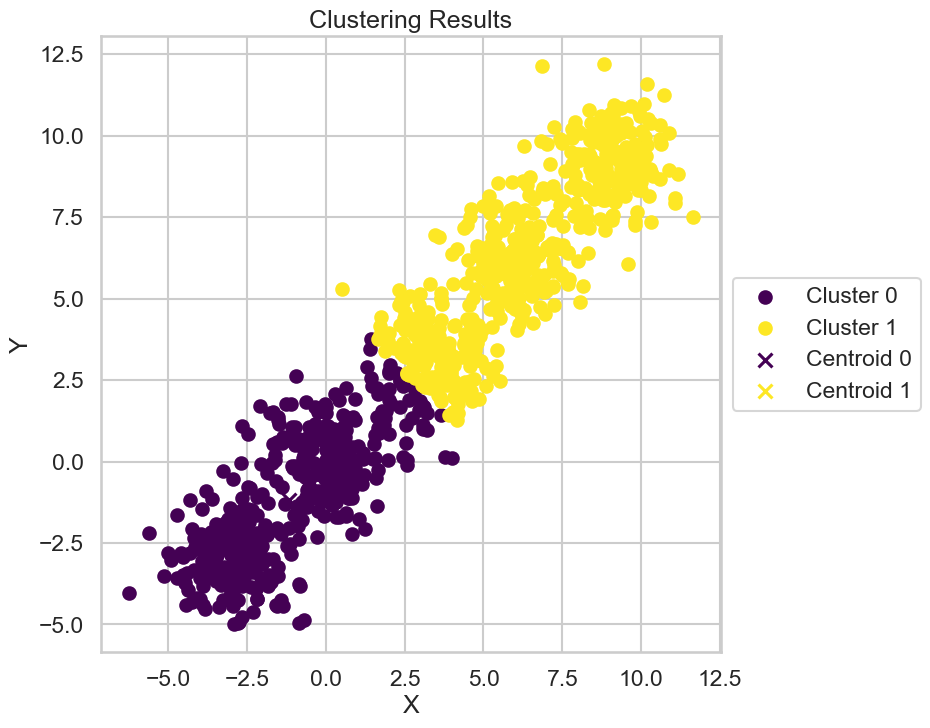

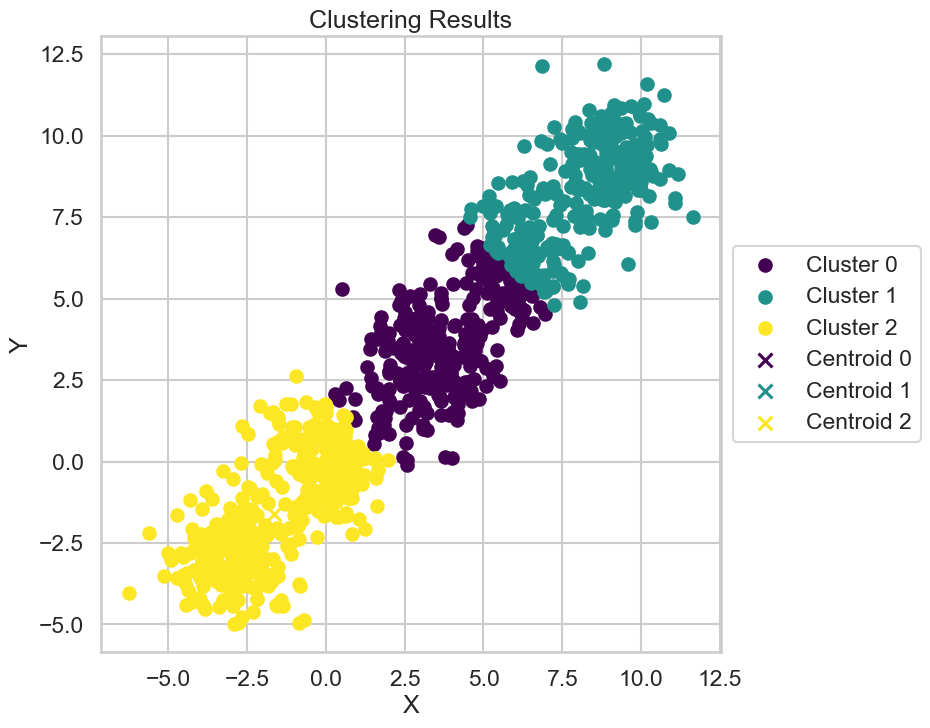

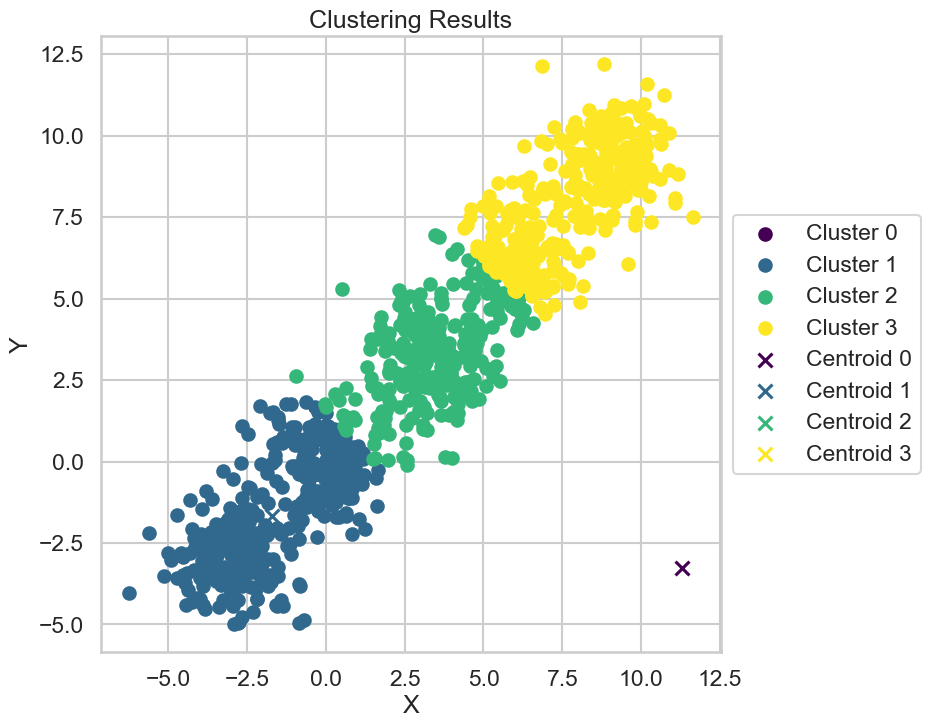

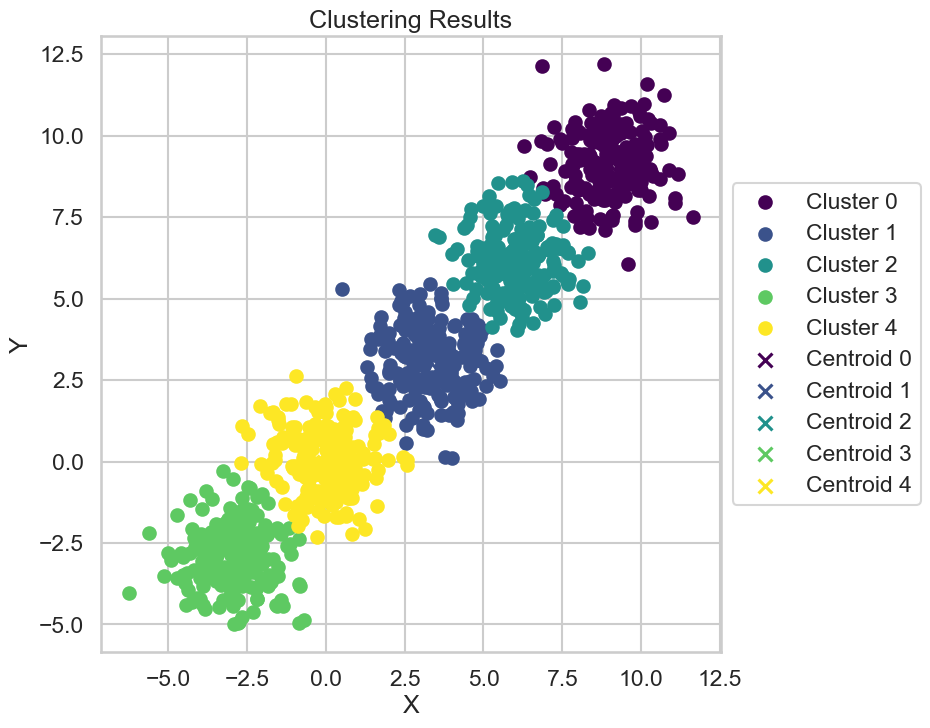

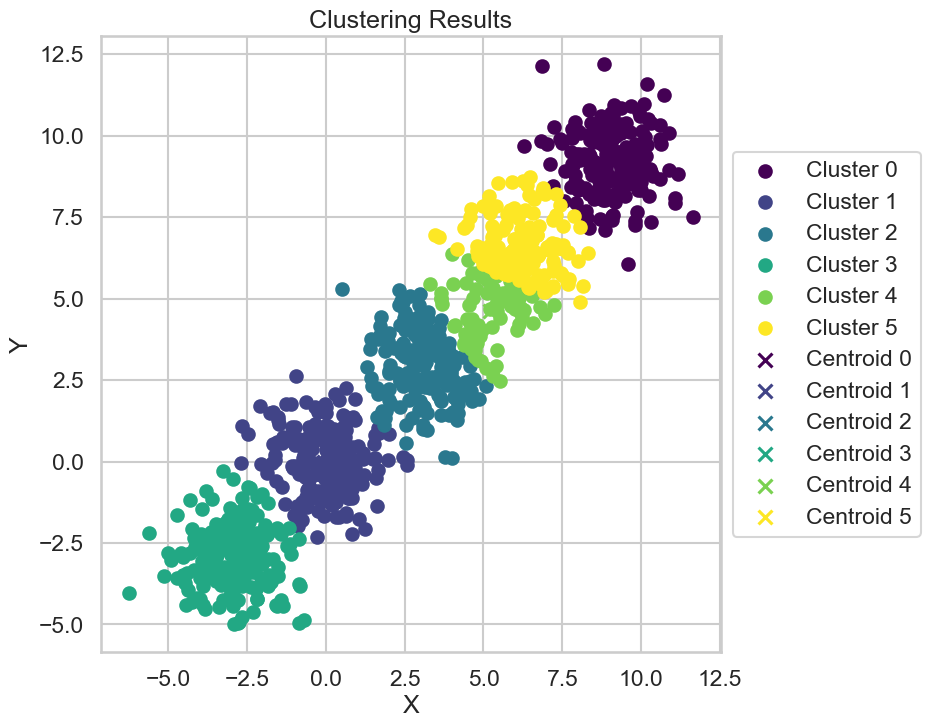

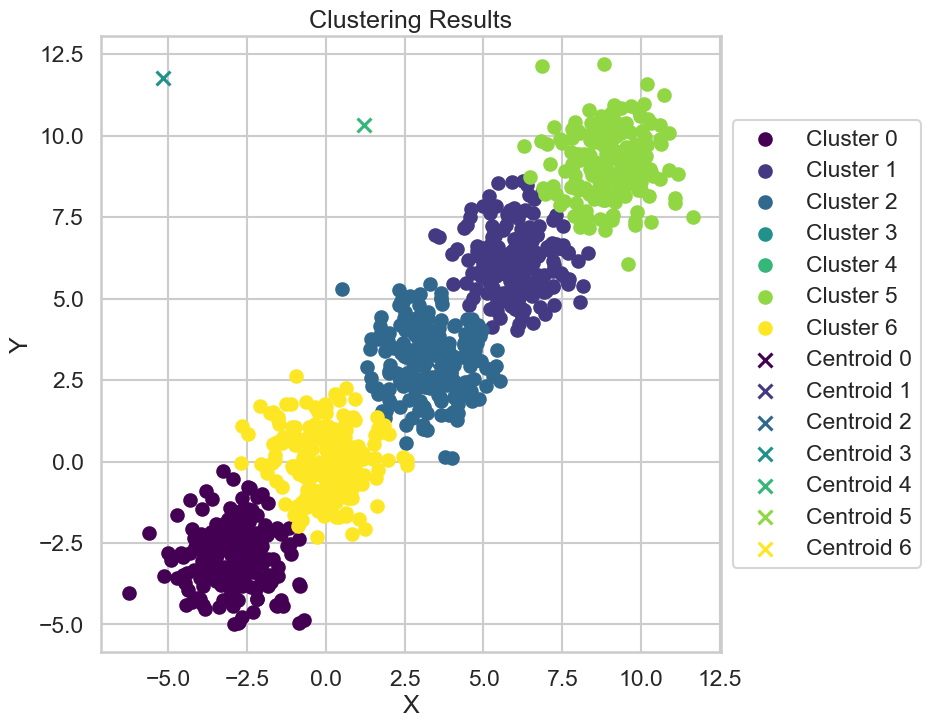

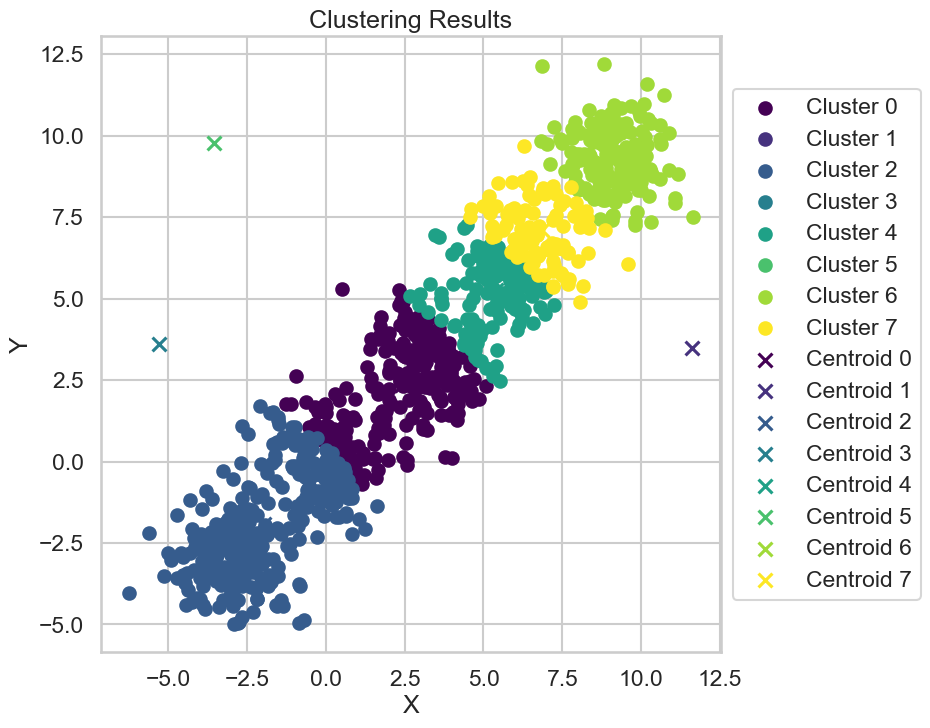

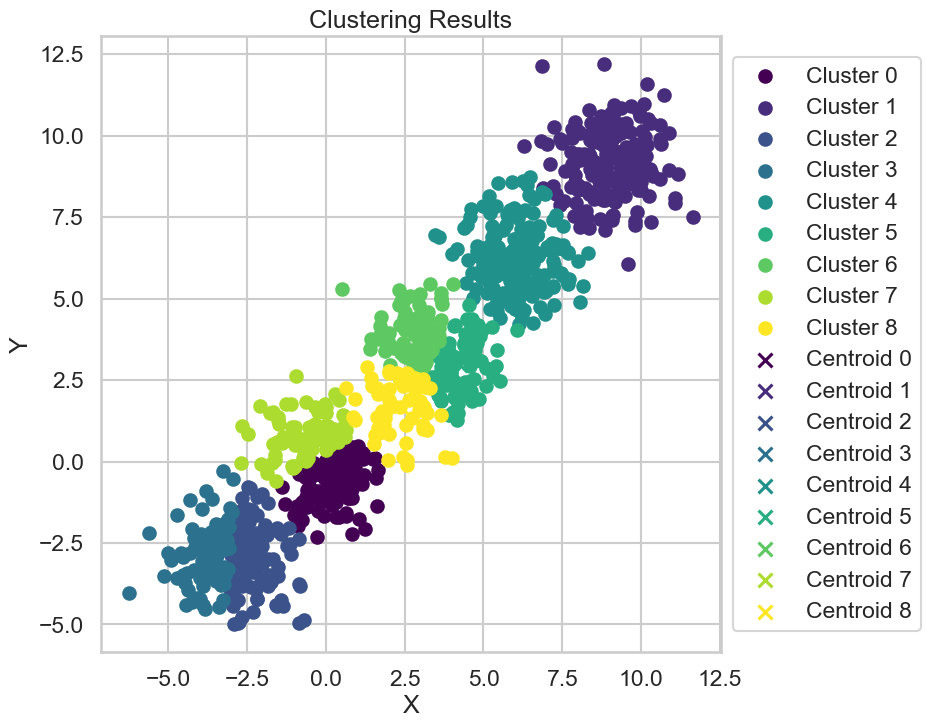

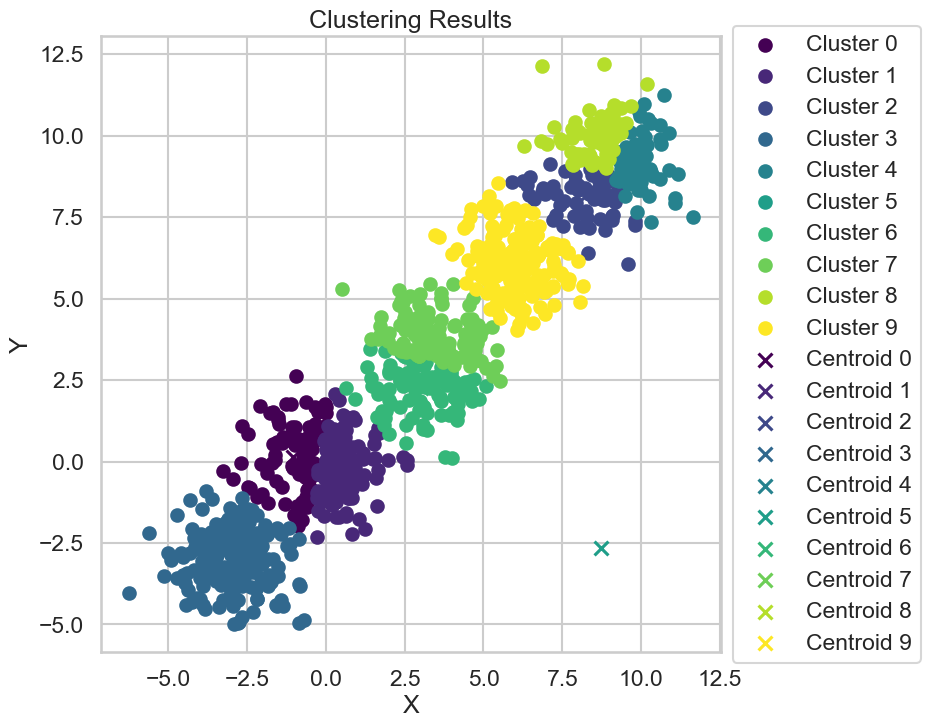

In [86]:
cm=[]
num_clusters_range = list(range(2, 11))

for Number_of_Clusters in num_clusters_range:
    Final_Cluster_Distancee,Cluster_Metrics = GUC_Kmean(Z, Number_of_Clusters, Distance_Type)
    cm.append(Cluster_Metrics)


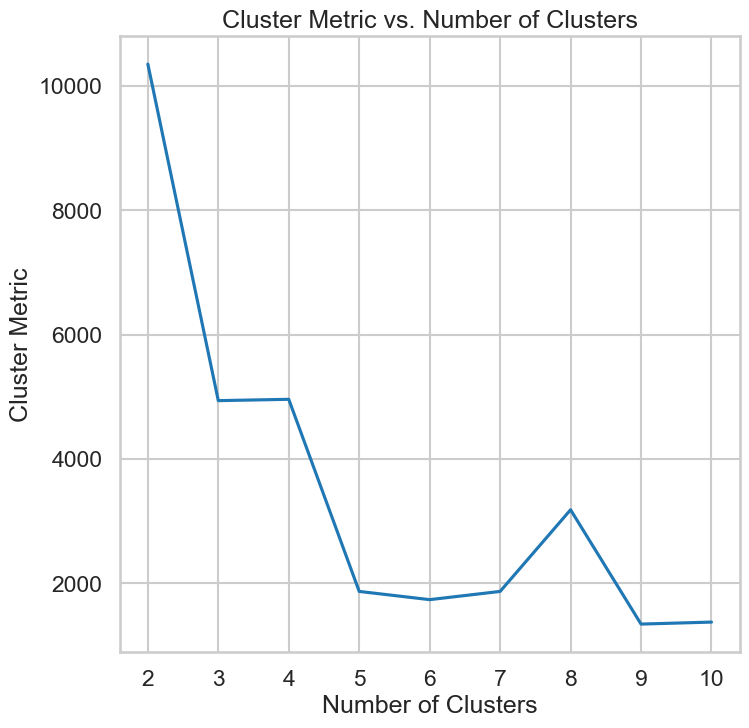

In [87]:
plt.plot(num_clusters_range, cm)
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. Number of Clusters')
plt.show()

#### 2.3. Example 3 : moons Data Gen and display 

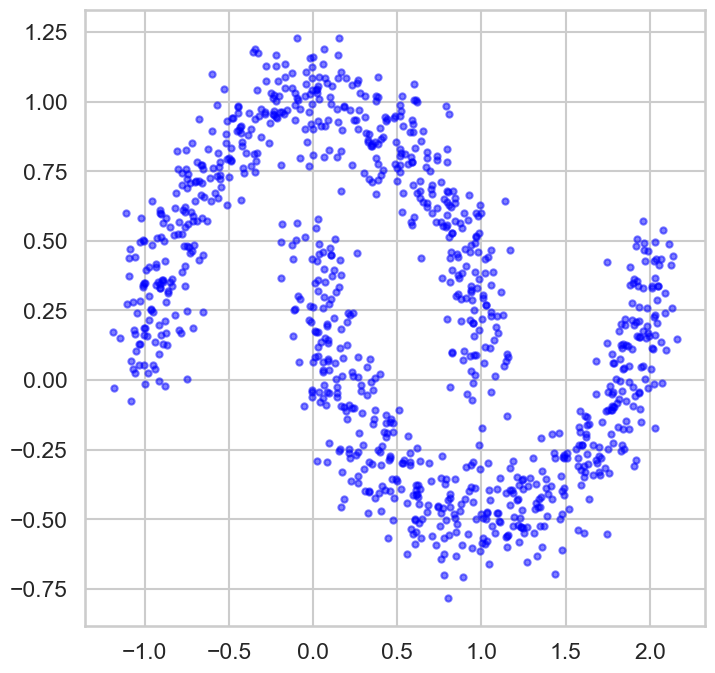

In [52]:
n_samples = 1000
V, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(V)

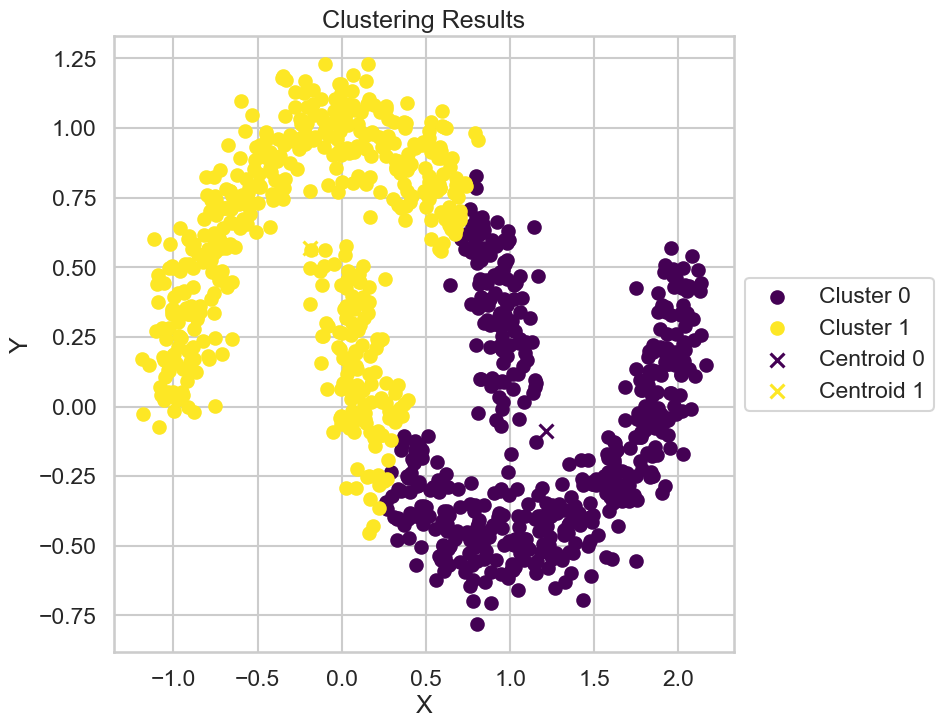

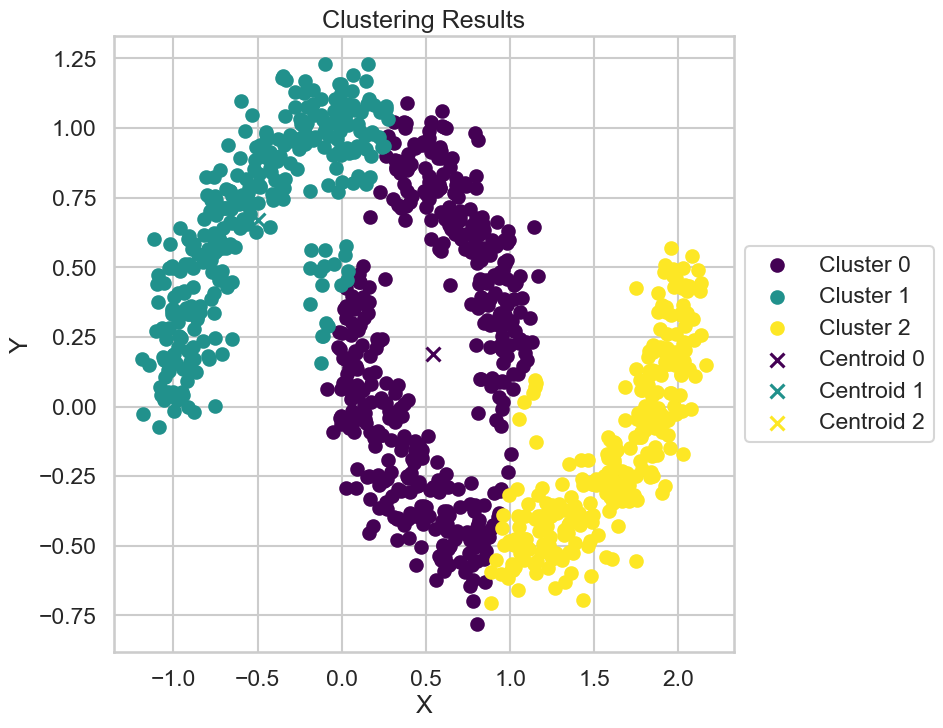

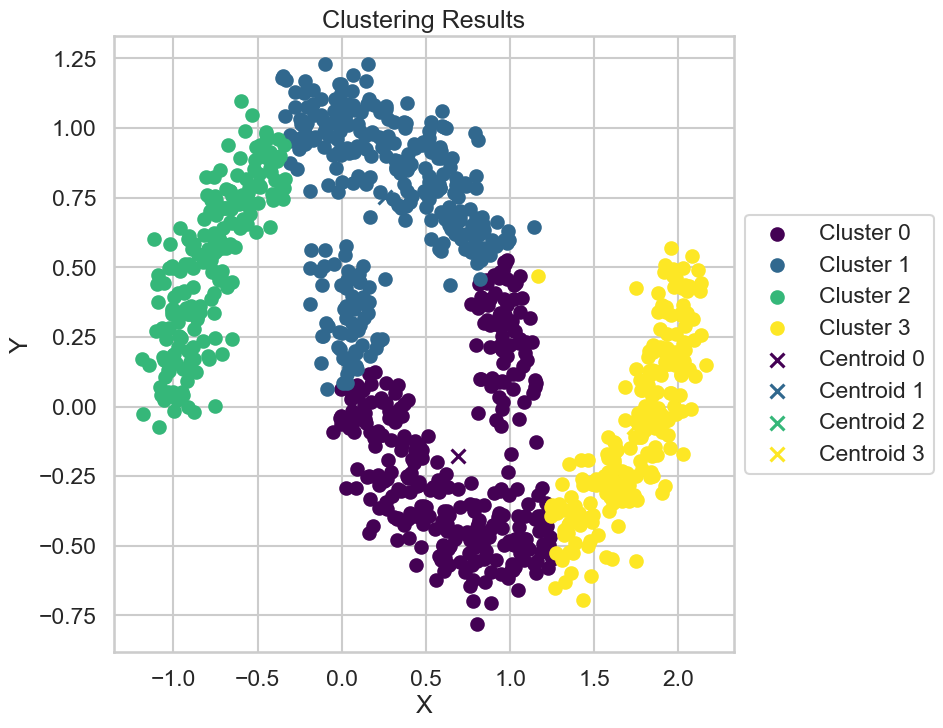

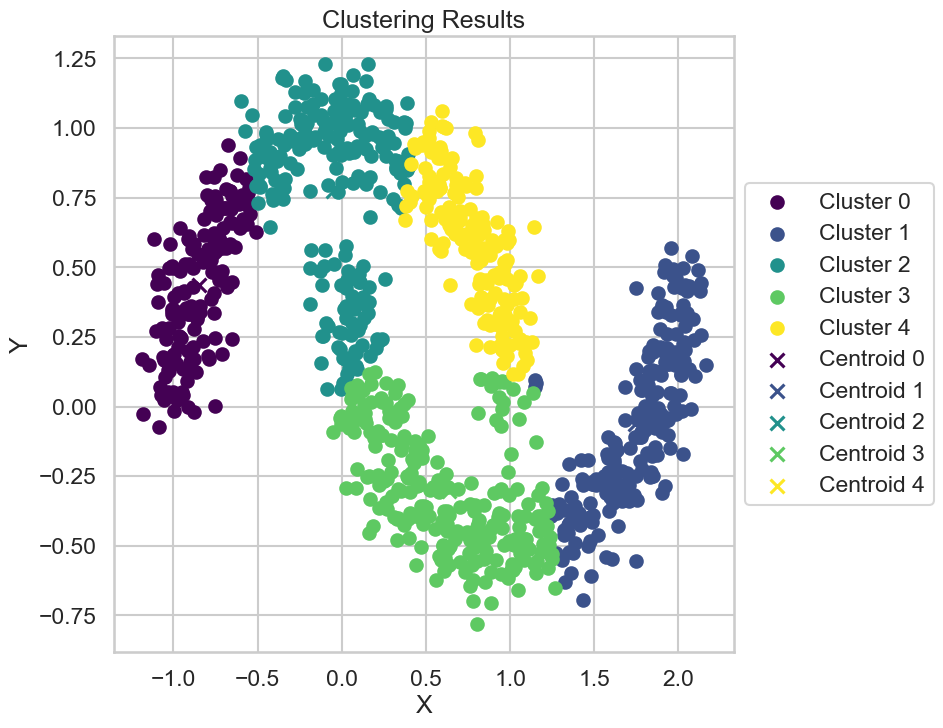

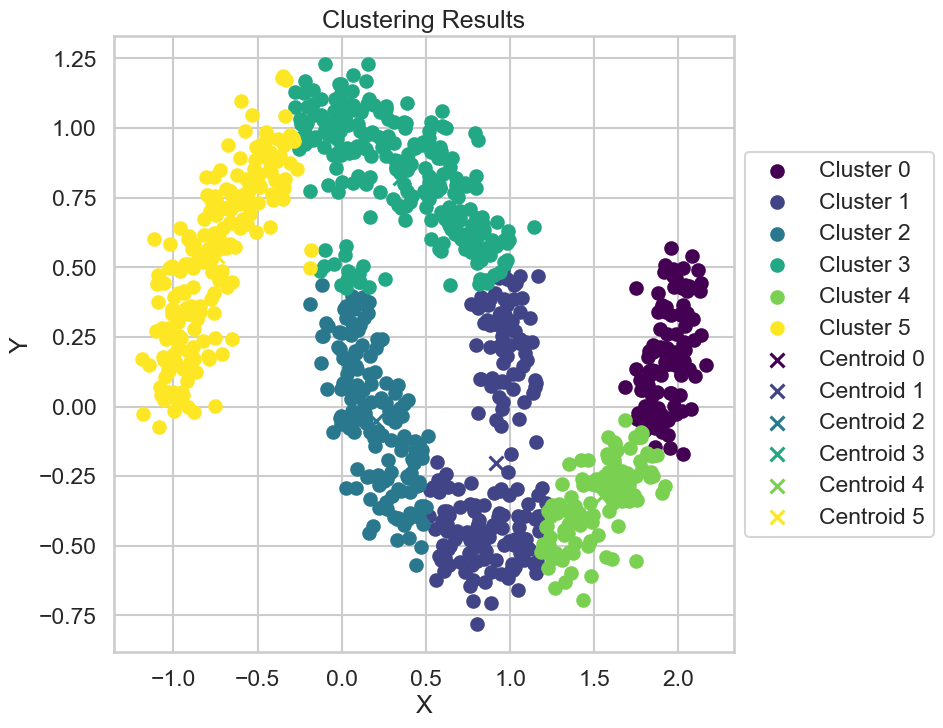

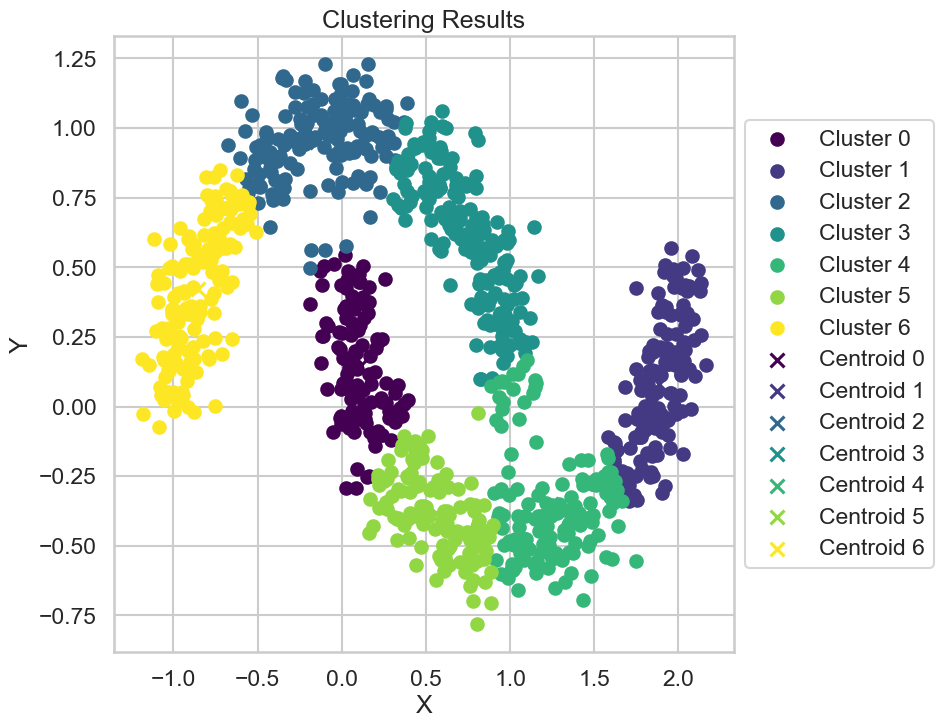

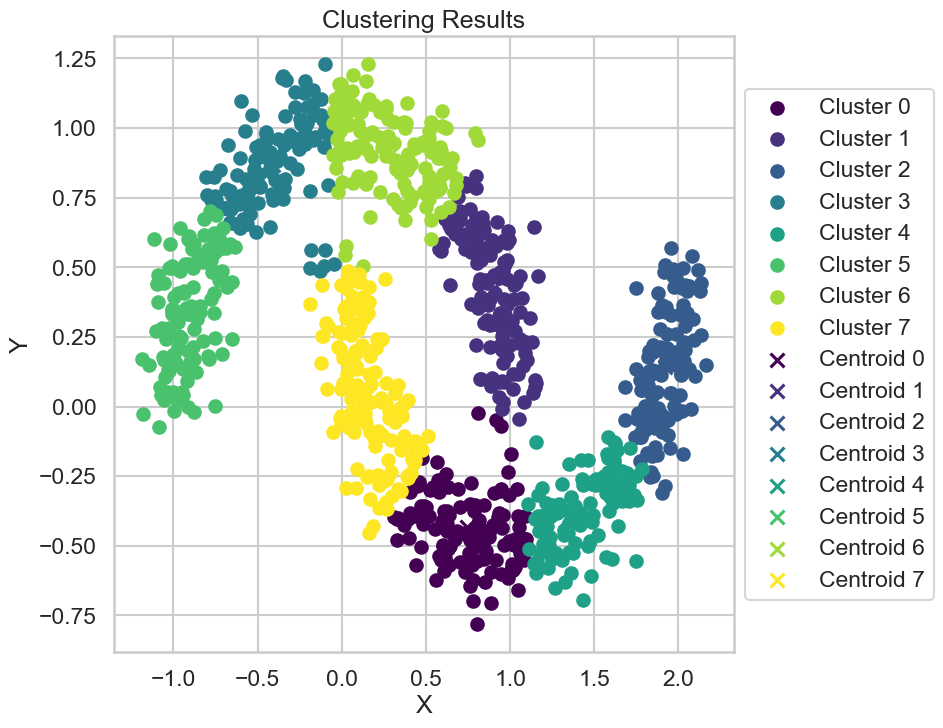

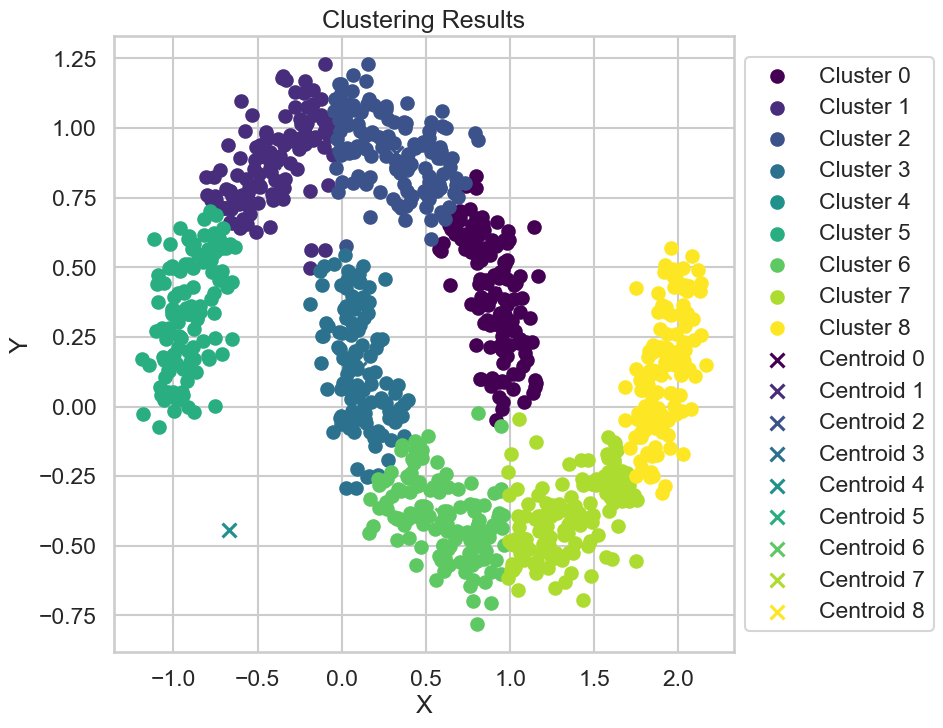

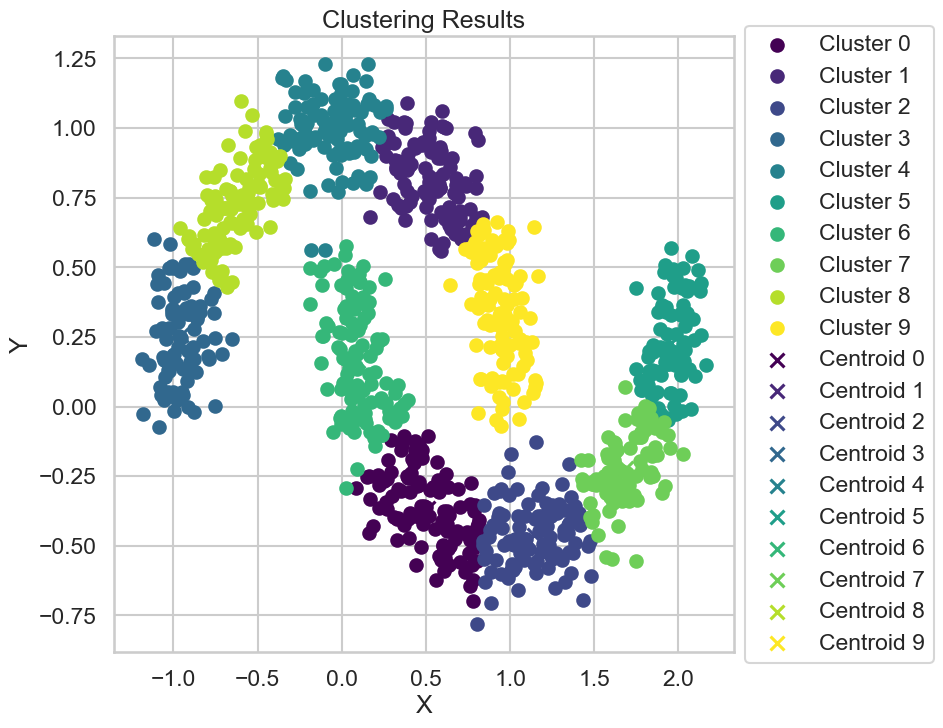

In [101]:
km=[]
for Number_of_Clusters in num_clusters_range:
    Final_Cluster_Distancee,Cluster_Metrics = GUC_Kmean(V, Number_of_Clusters, Distance_Type)
    km.append(Cluster_Metrics)


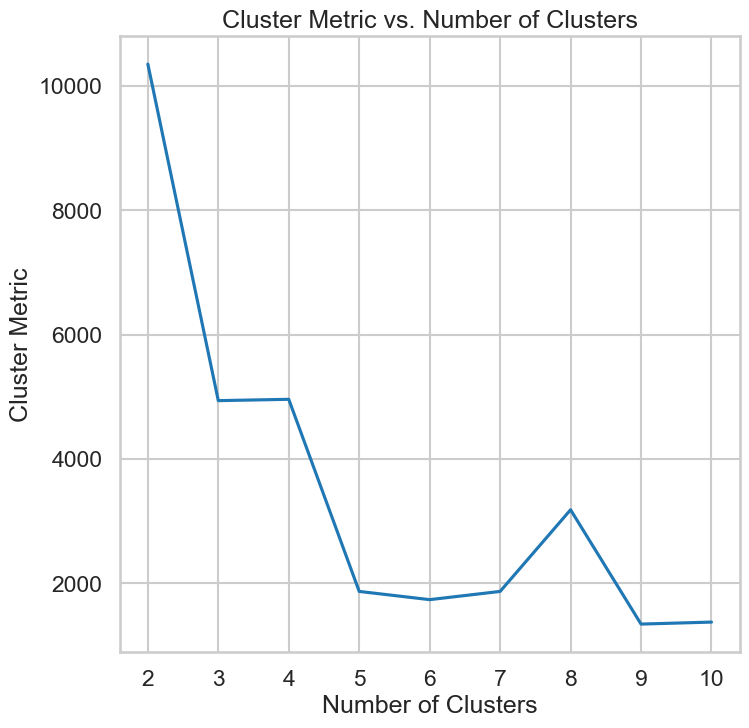

In [102]:
plt.plot(num_clusters_range, cm)
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. Number of Clusters')
plt.show()

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [90]:
from sklearn.decomposition import PCA

In [98]:
df=pd.read_csv("D:\Guc\Sem 10\ML\Assign 1\Customer data.csv")
data = df.drop(columns=['ID'])
data_matrix = data.values
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_matrix)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


0
1


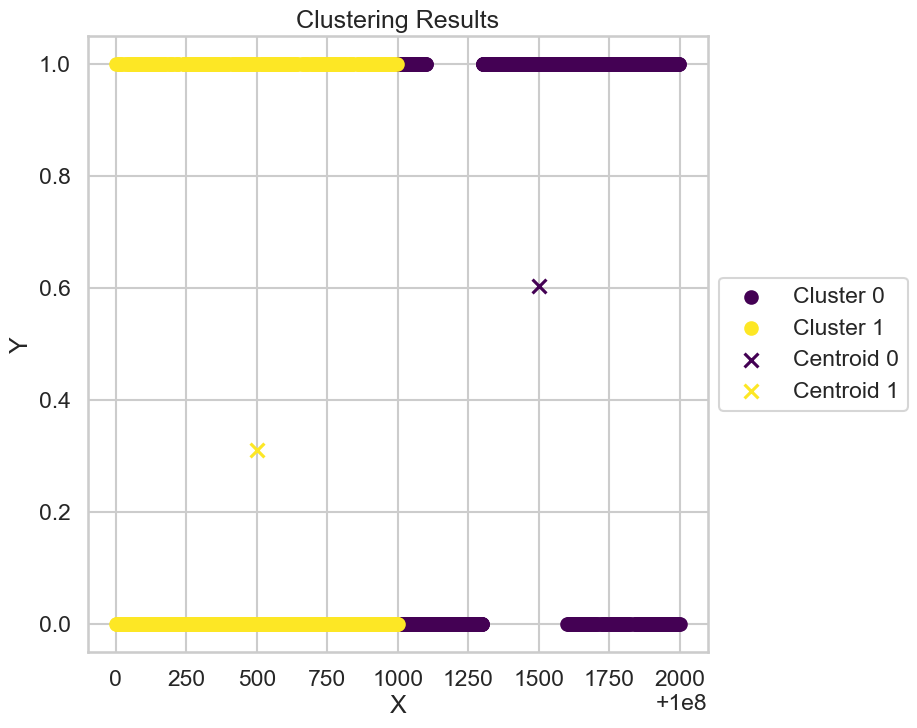

2


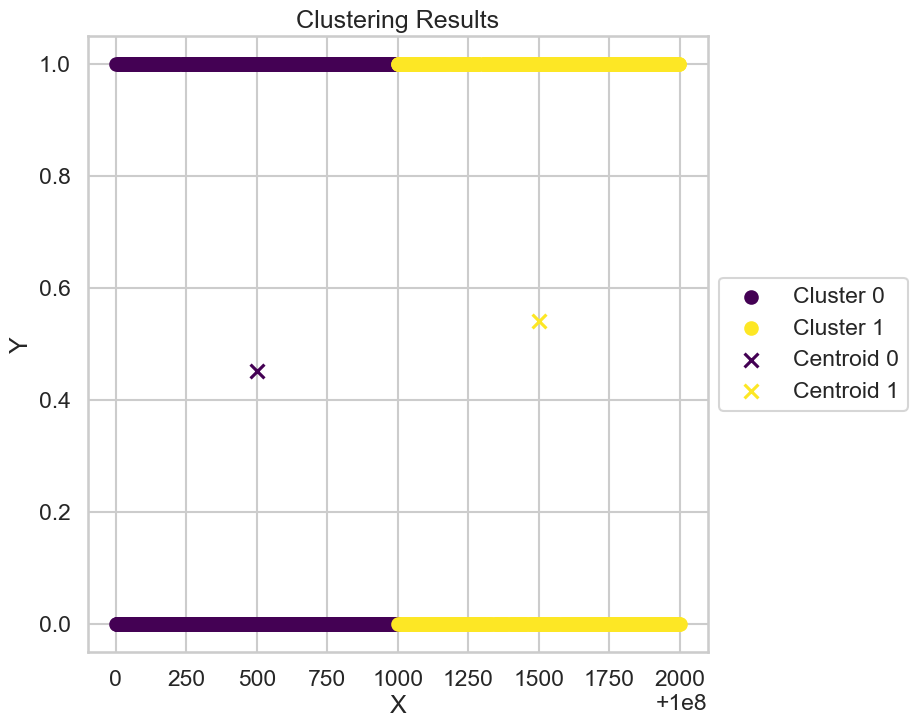

3


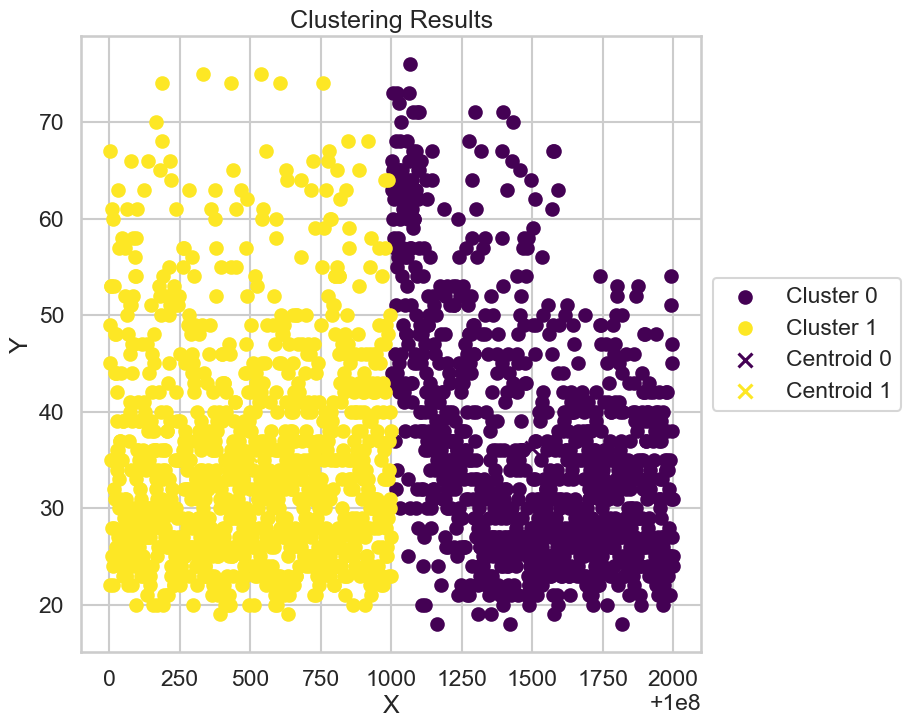

4


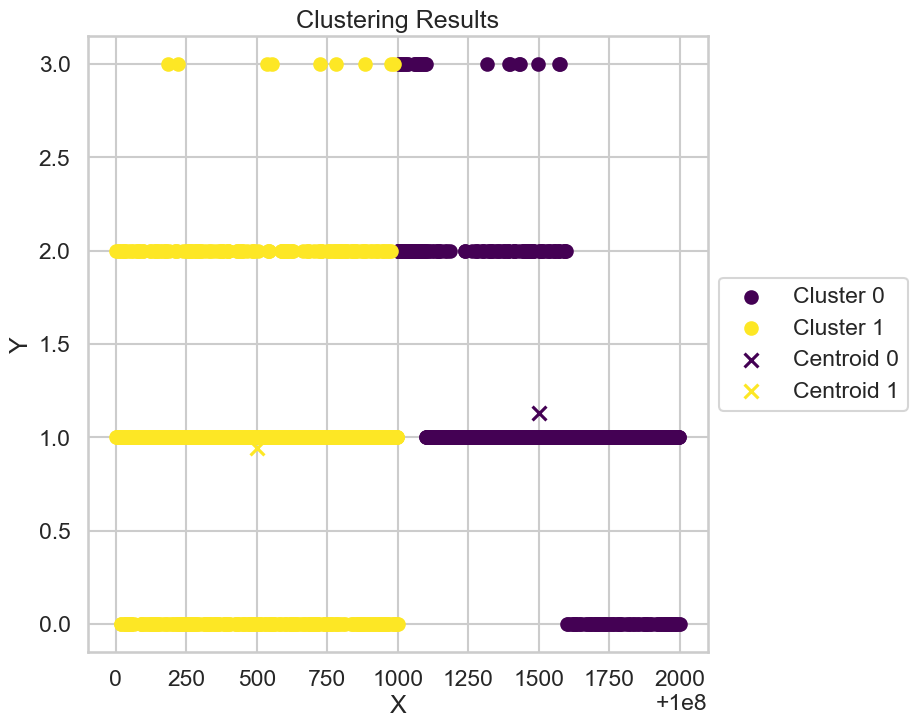

5


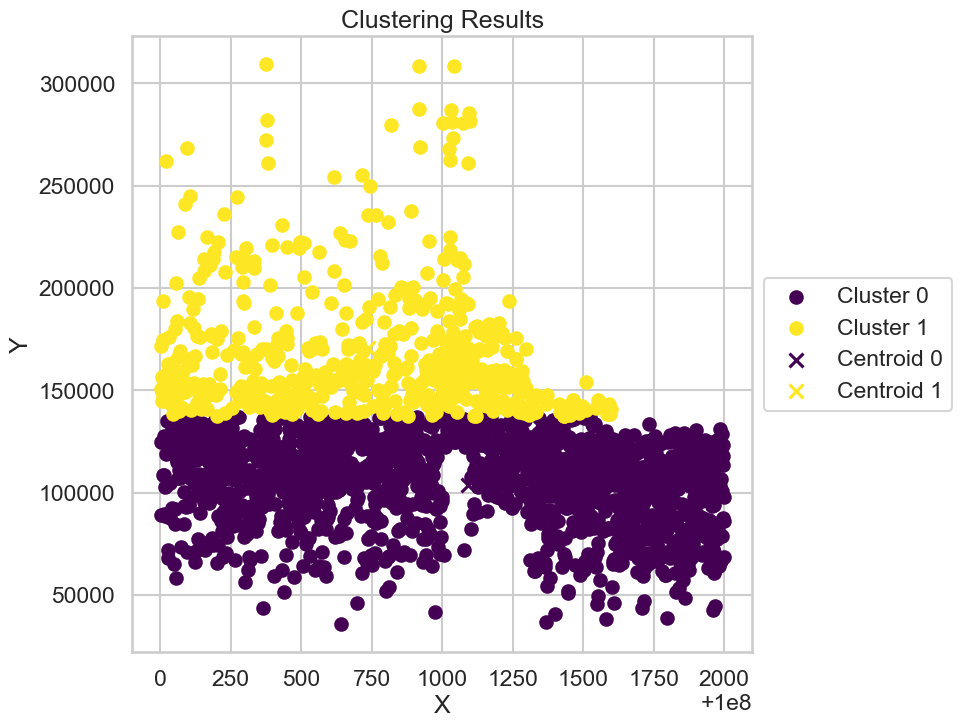

6


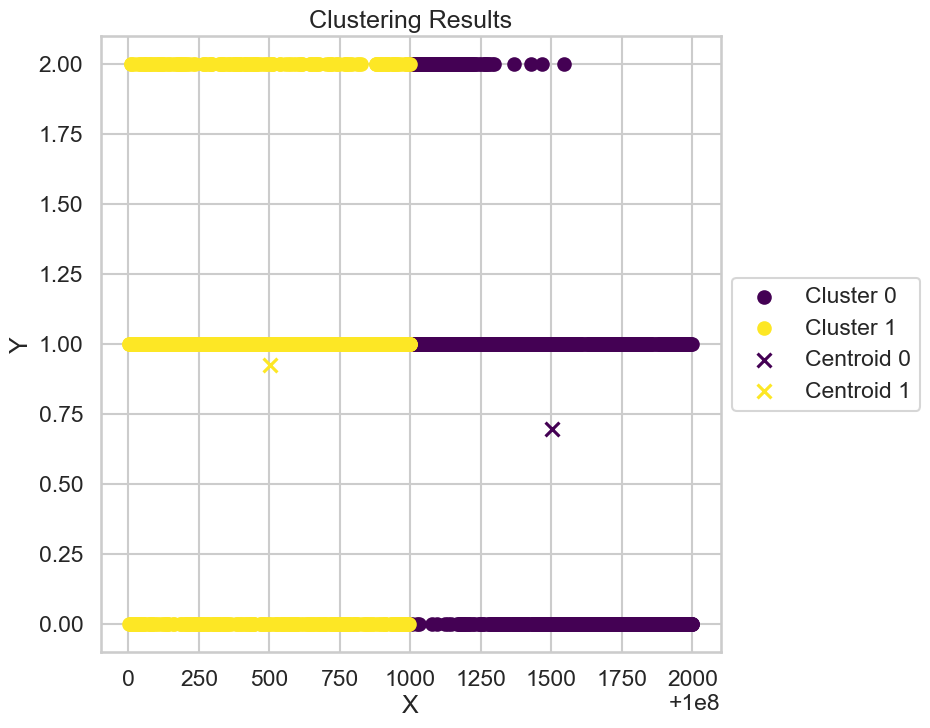

1
2


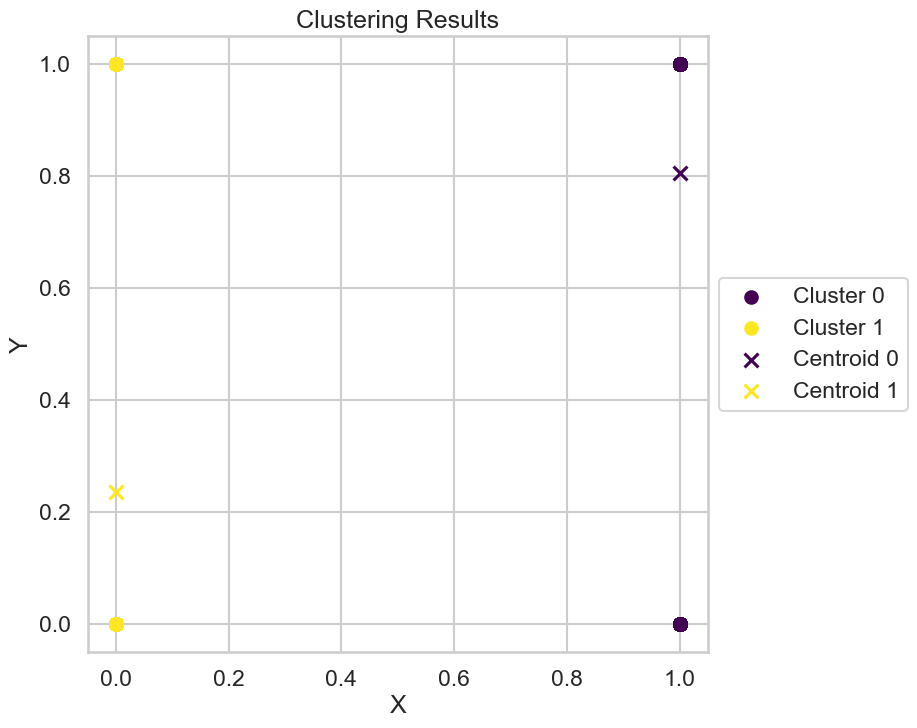

3


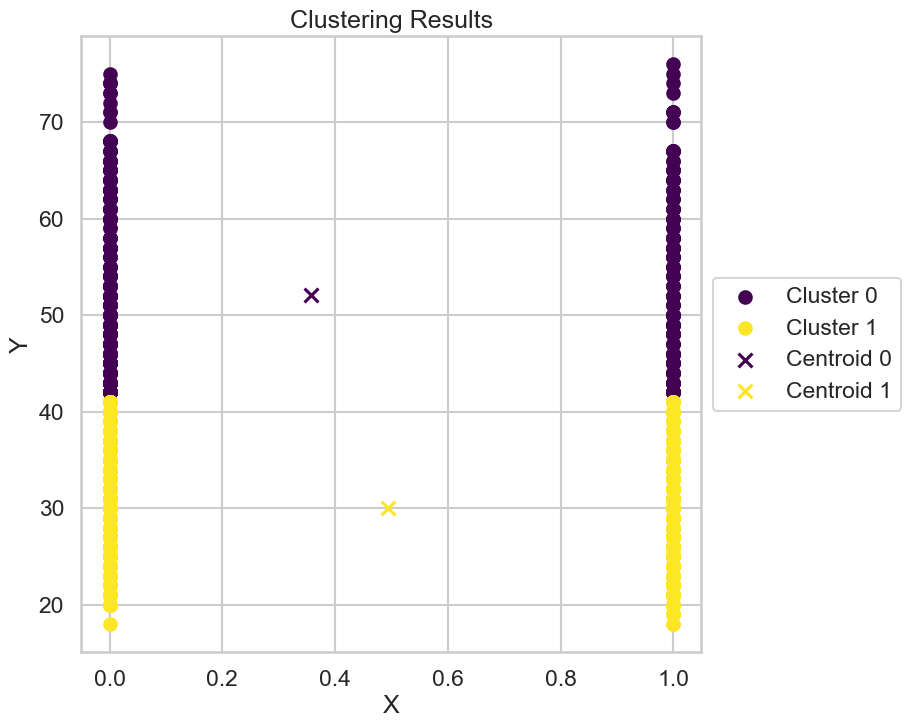

4


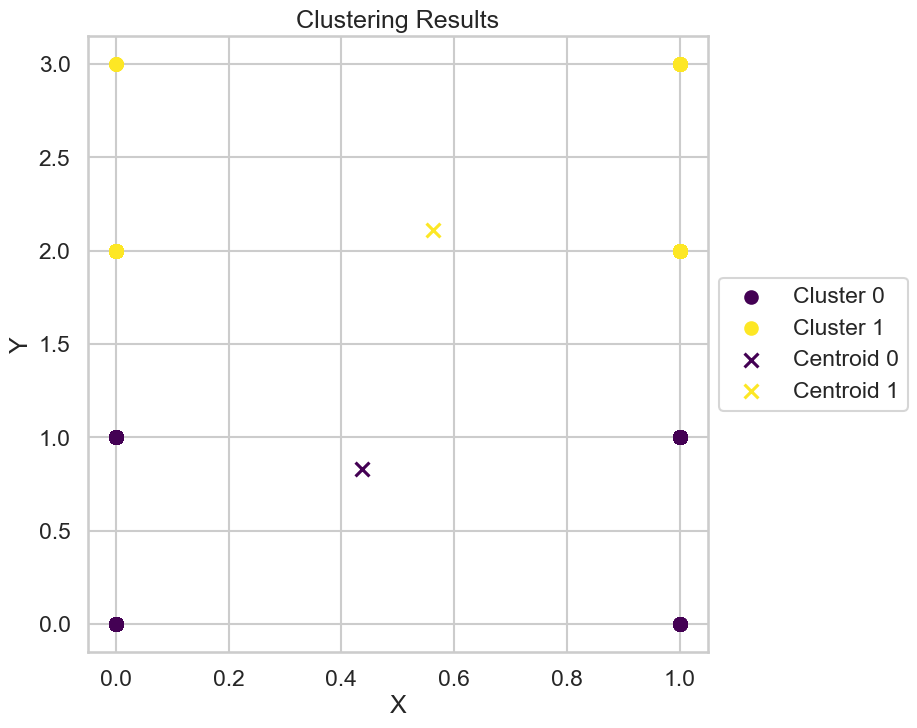

5


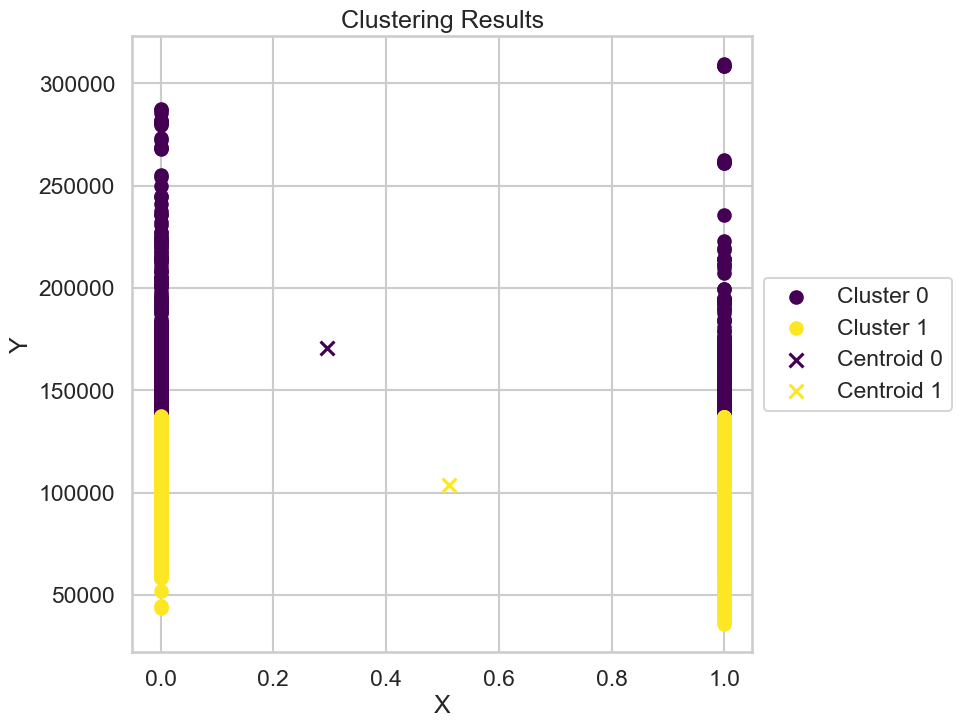

6


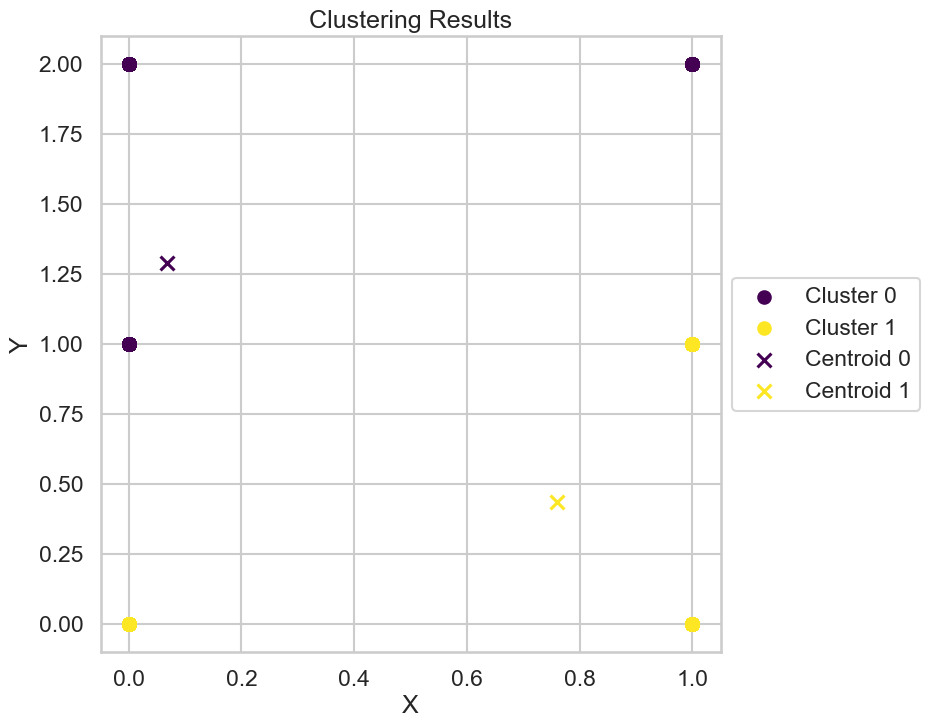

2
3


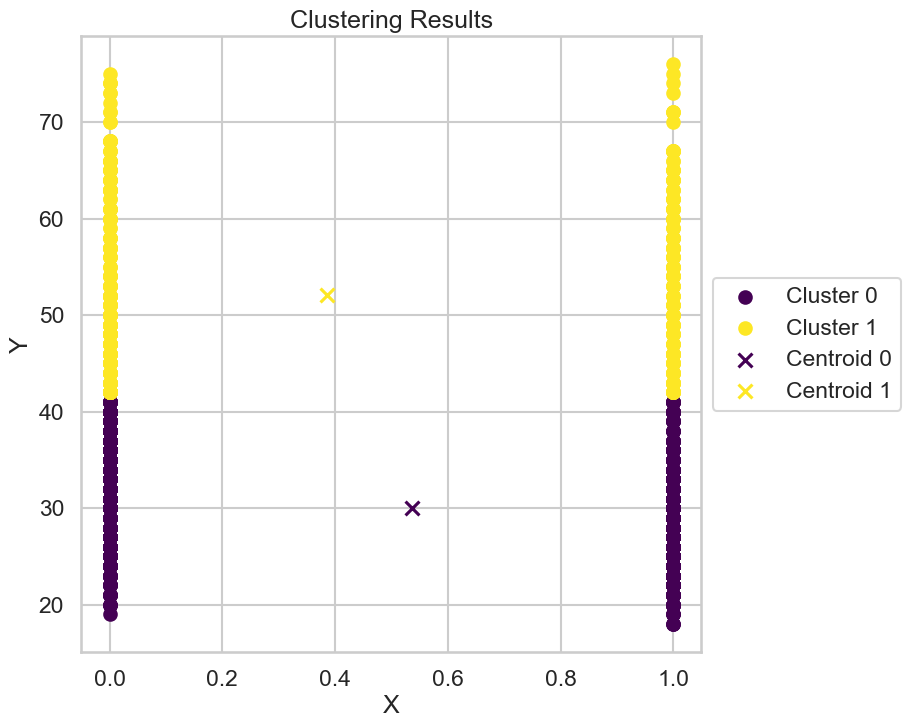

4


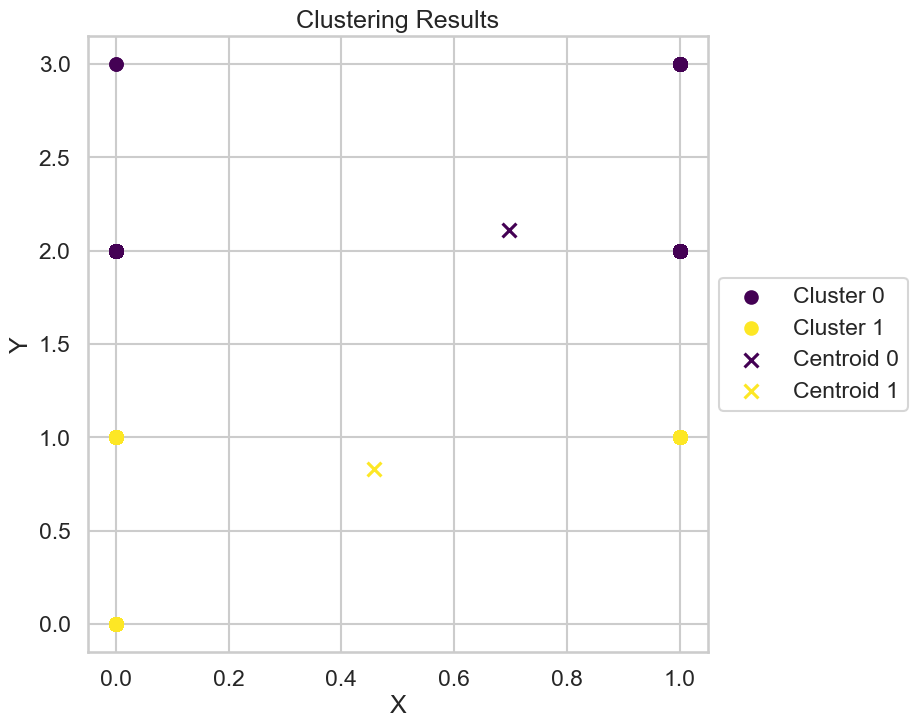

5


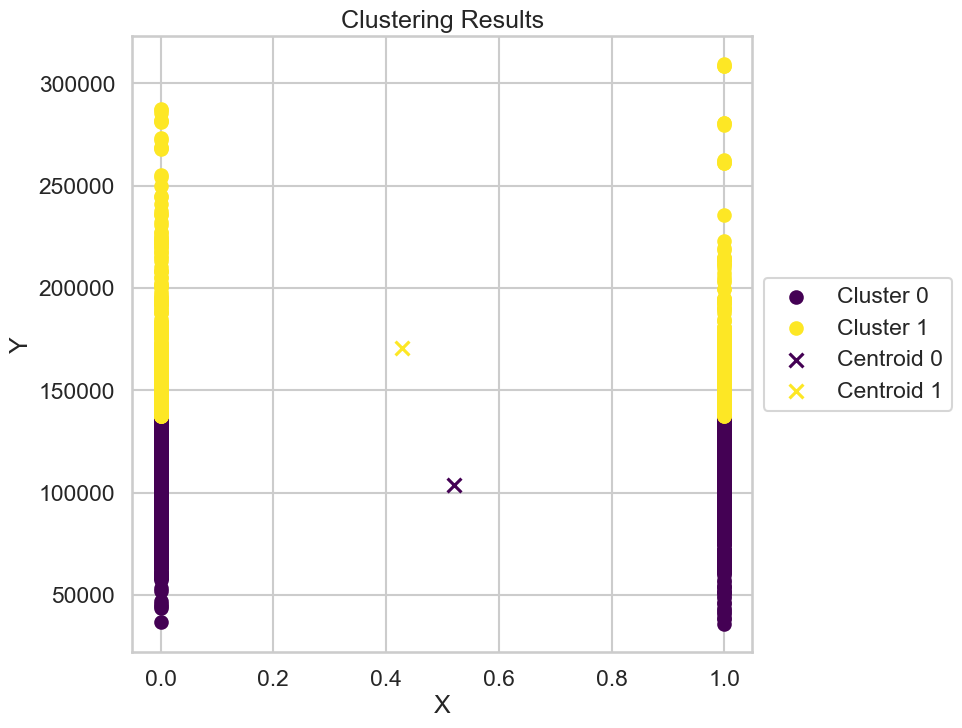

6


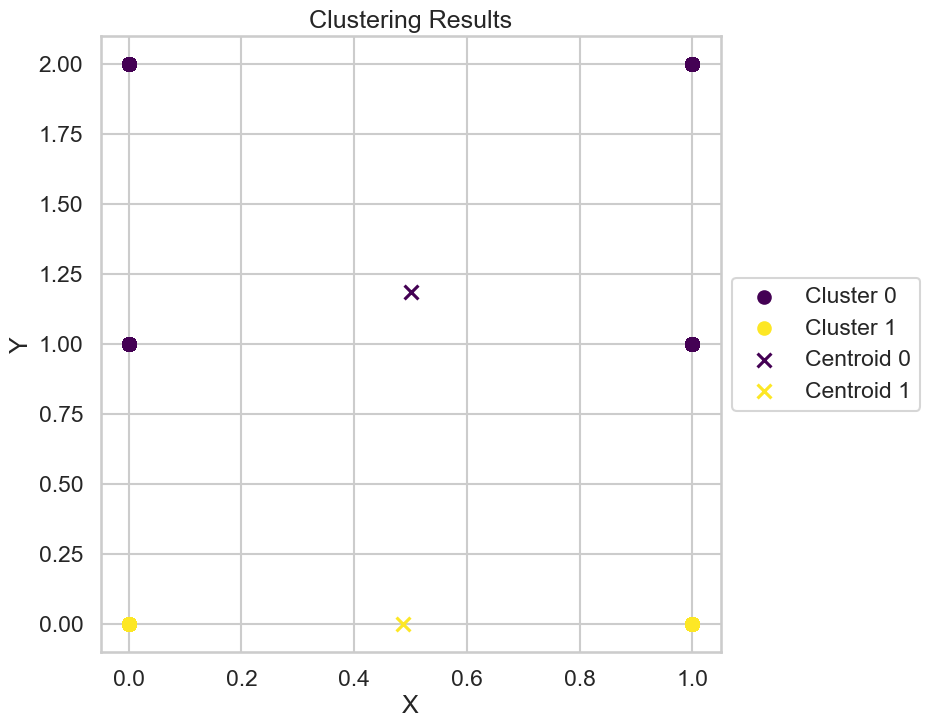

3
4


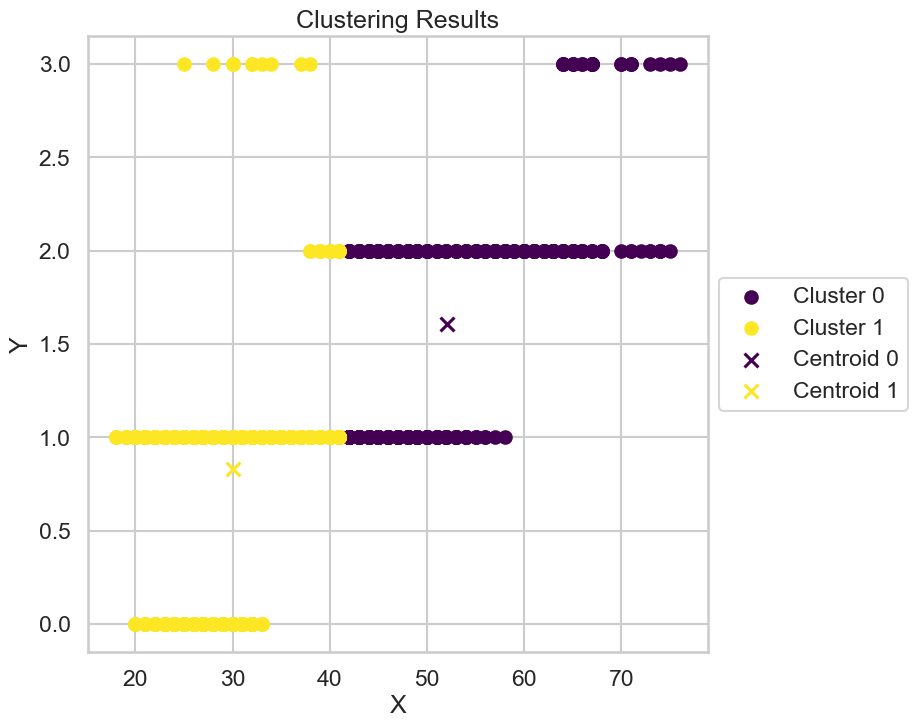

5


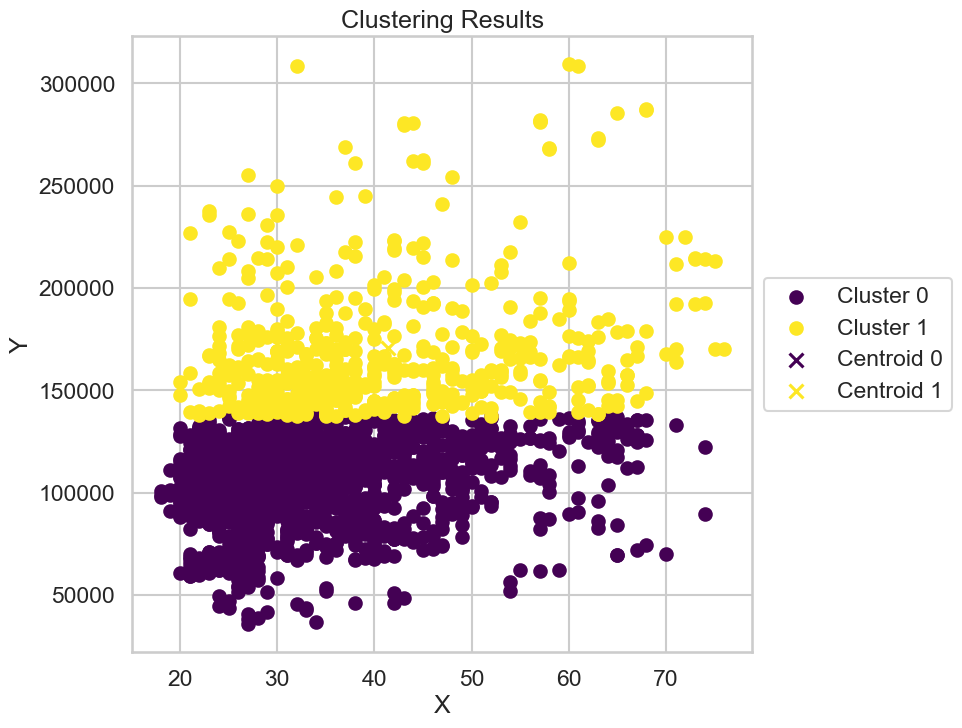

6


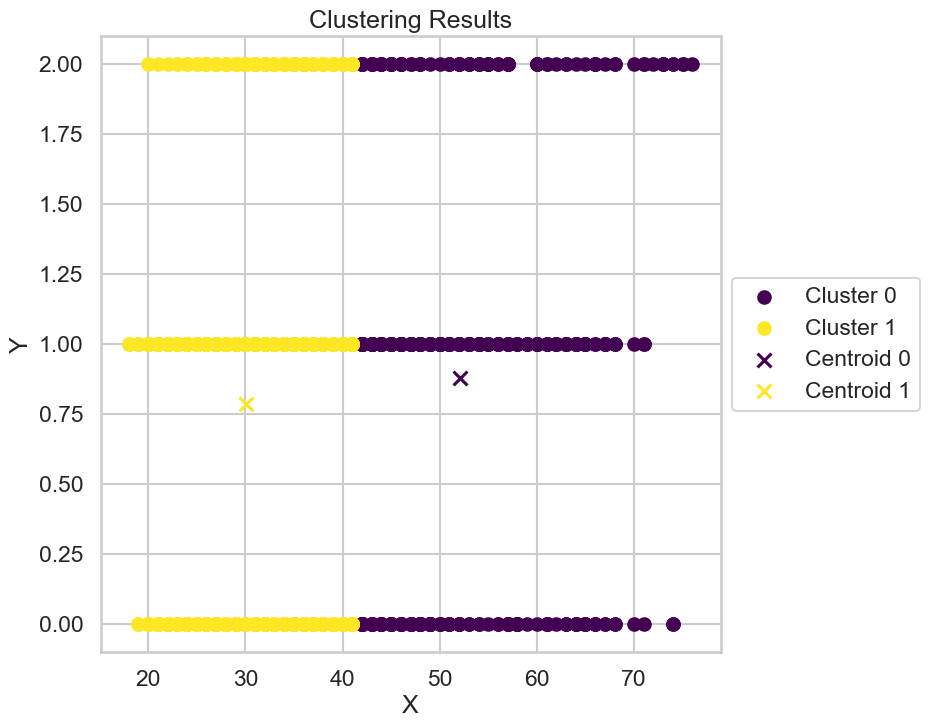

4
5


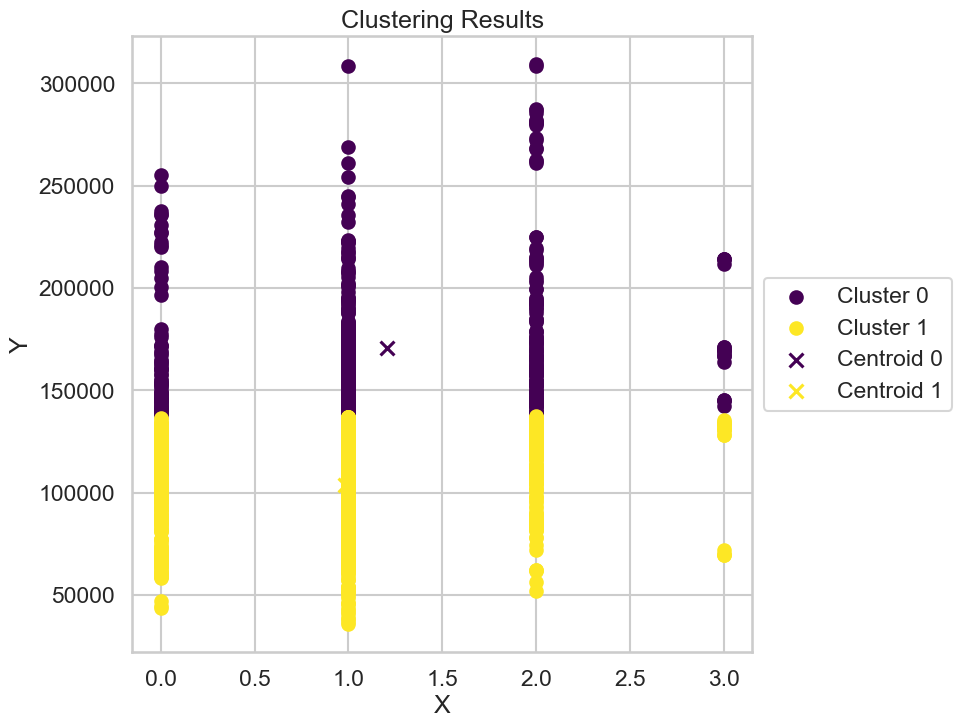

6


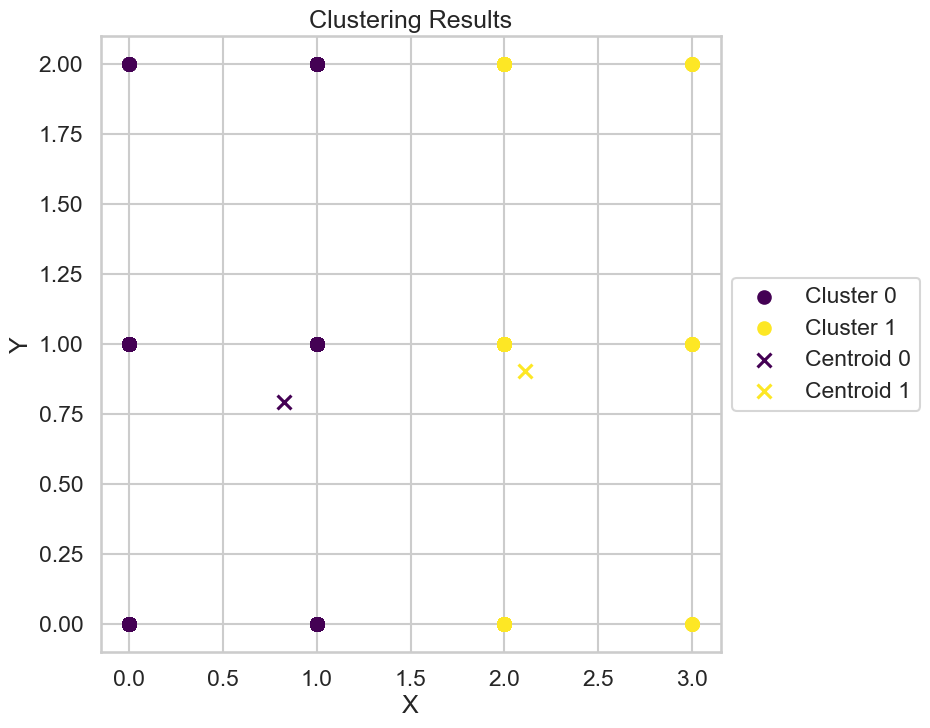

5
6


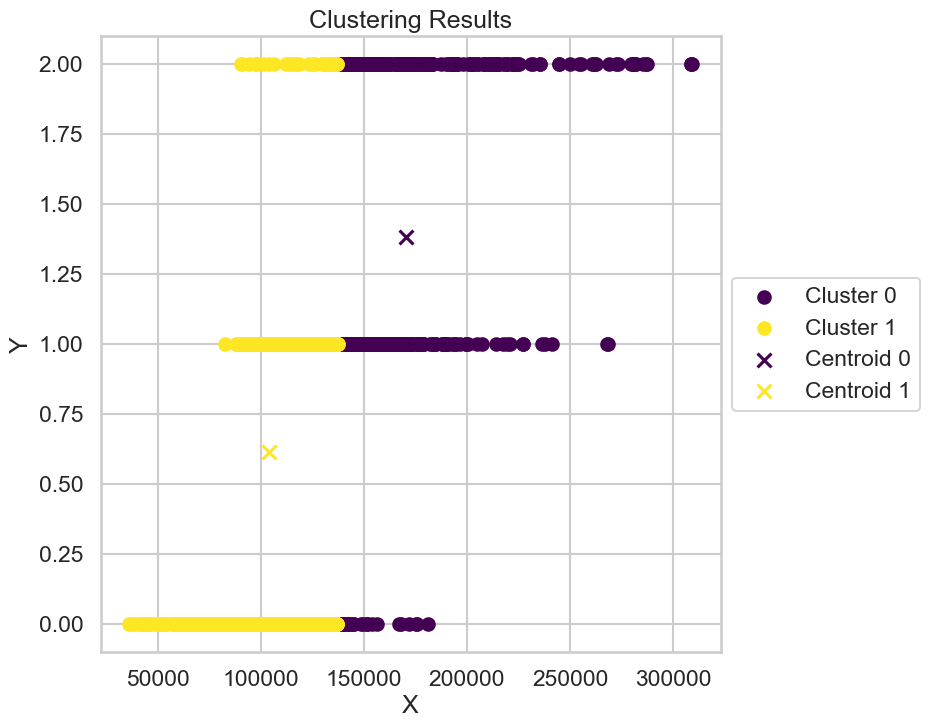

6
7


In [116]:
cols=df.columns
k=2
i=0

while i < len(cols):
    j=i+1
    print(i)
    while j < len(cols)-1:
        print(j)
        d=df[[cols[i],cols[j]]]
        d=np.array(d)
        m,n=GUC_Kmean(d,k,1)
        j+=1
    
    i+=1
         

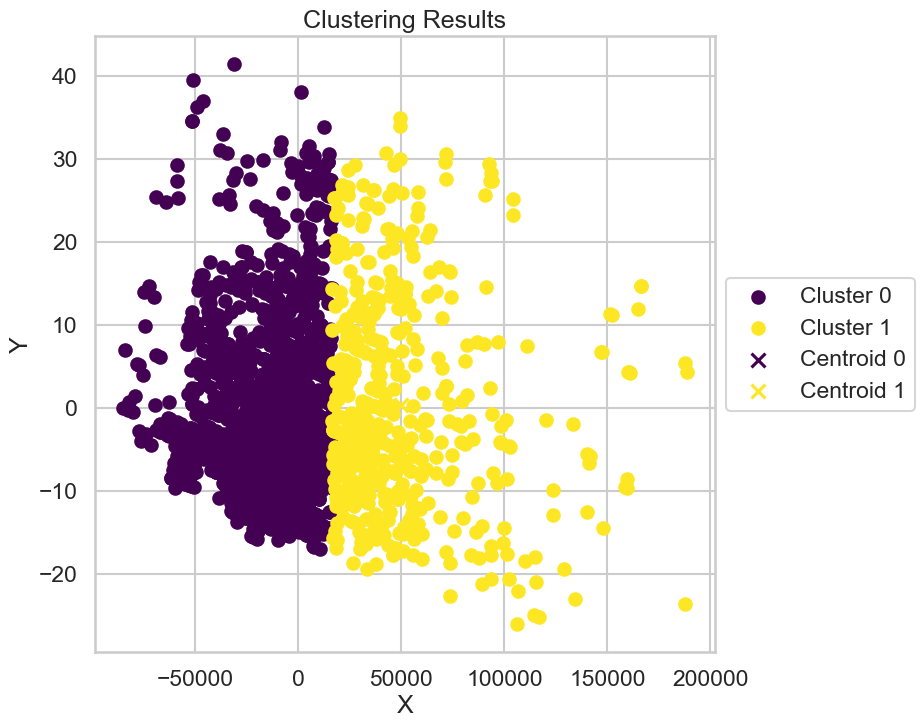

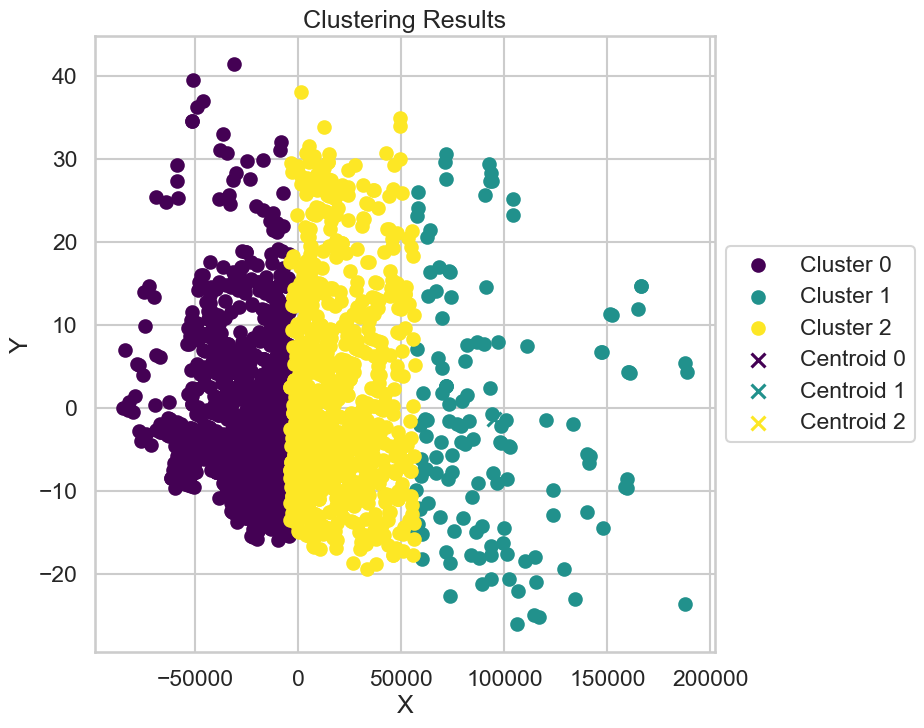

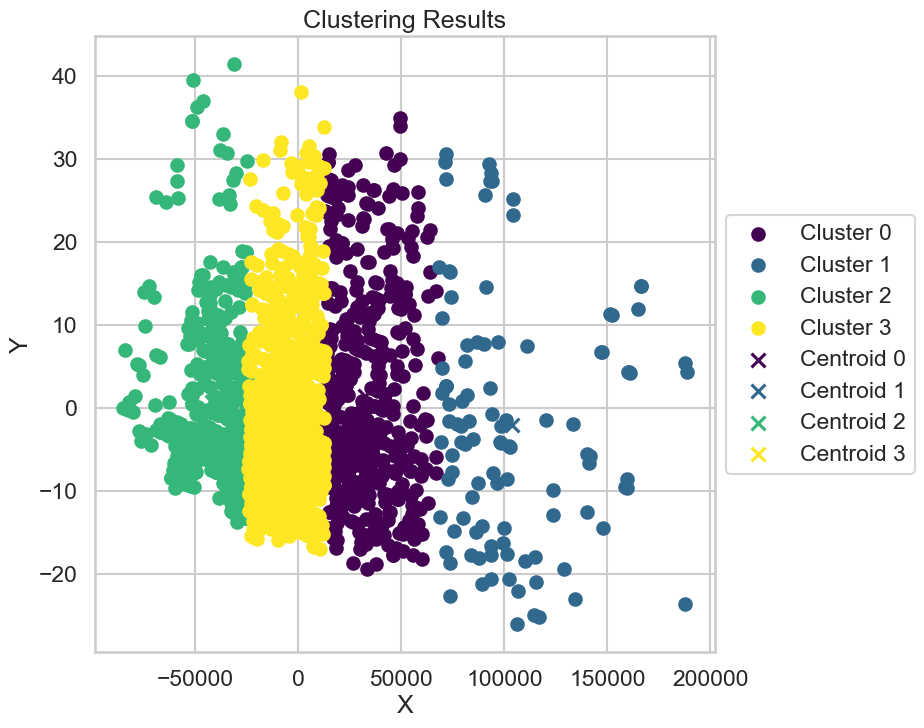

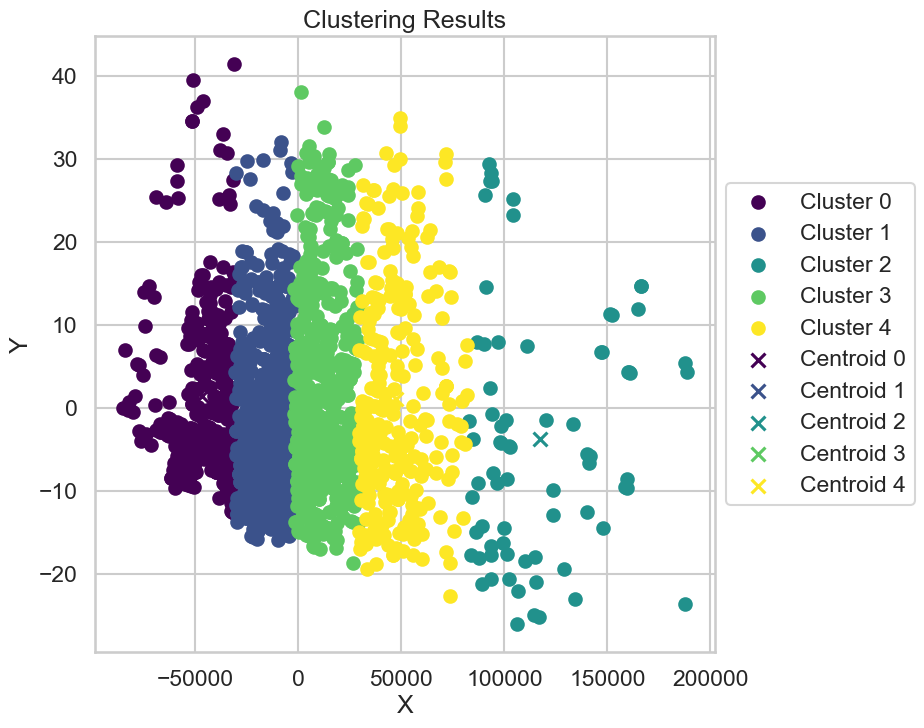

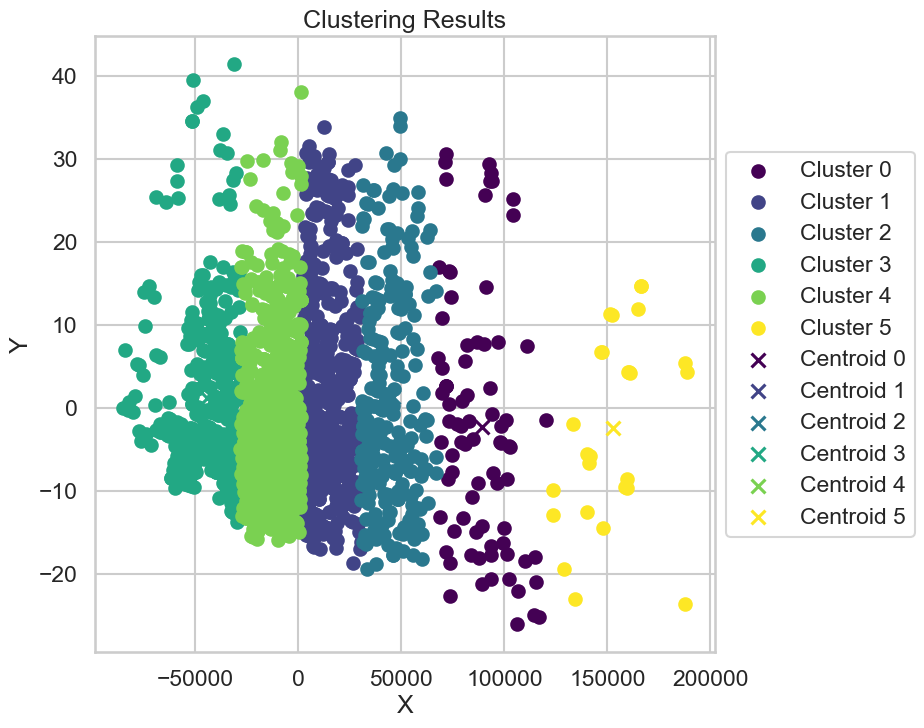

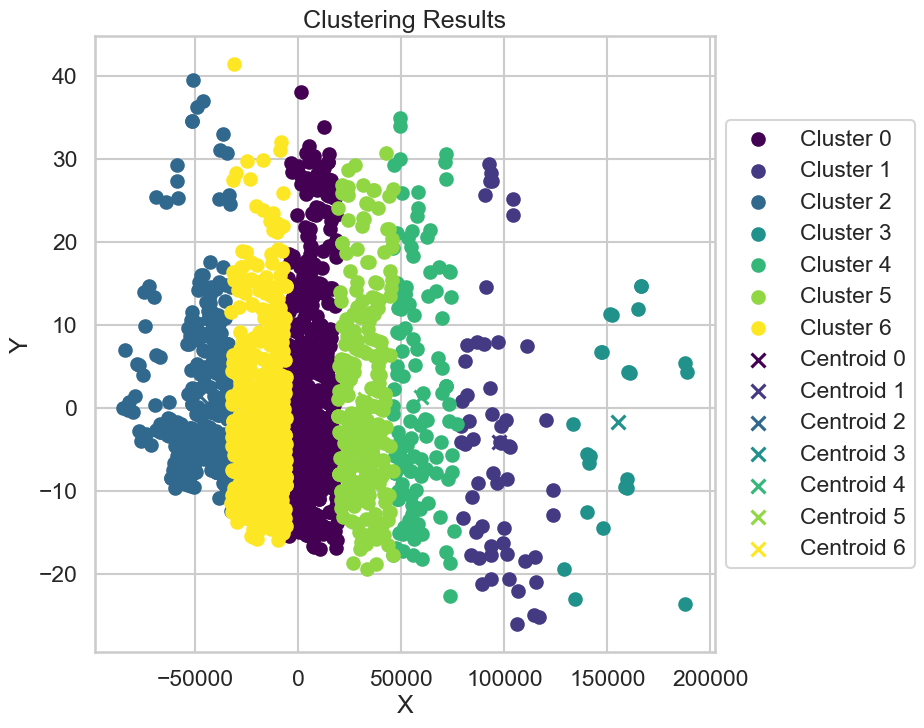

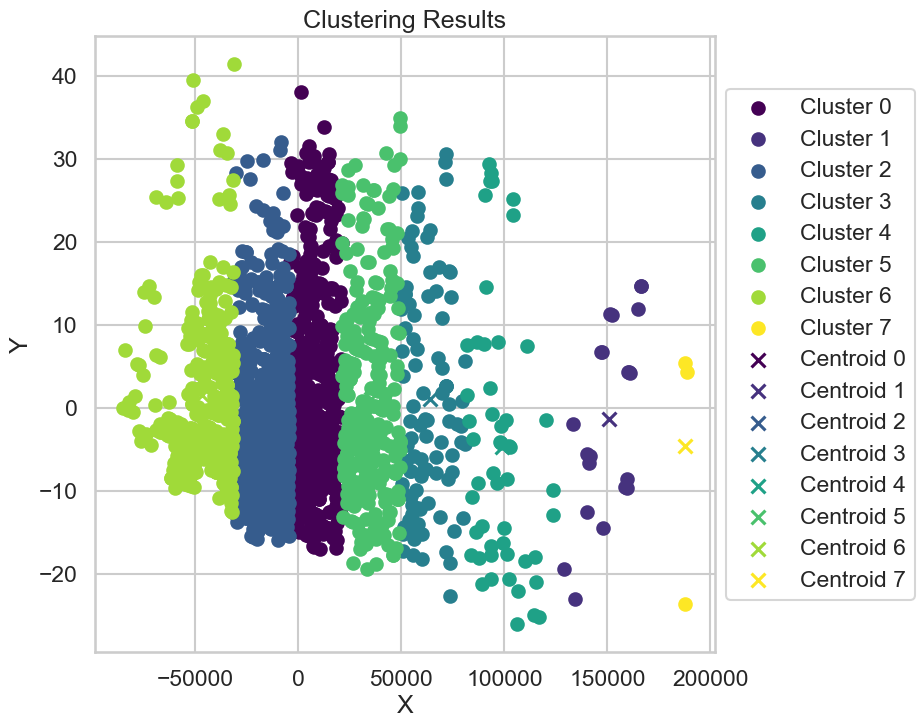

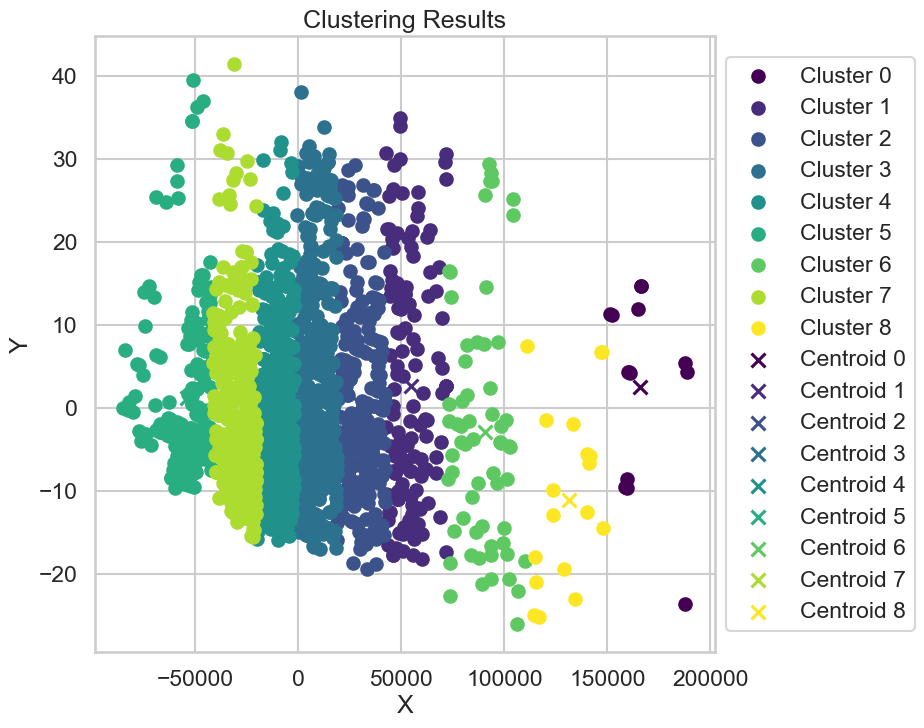

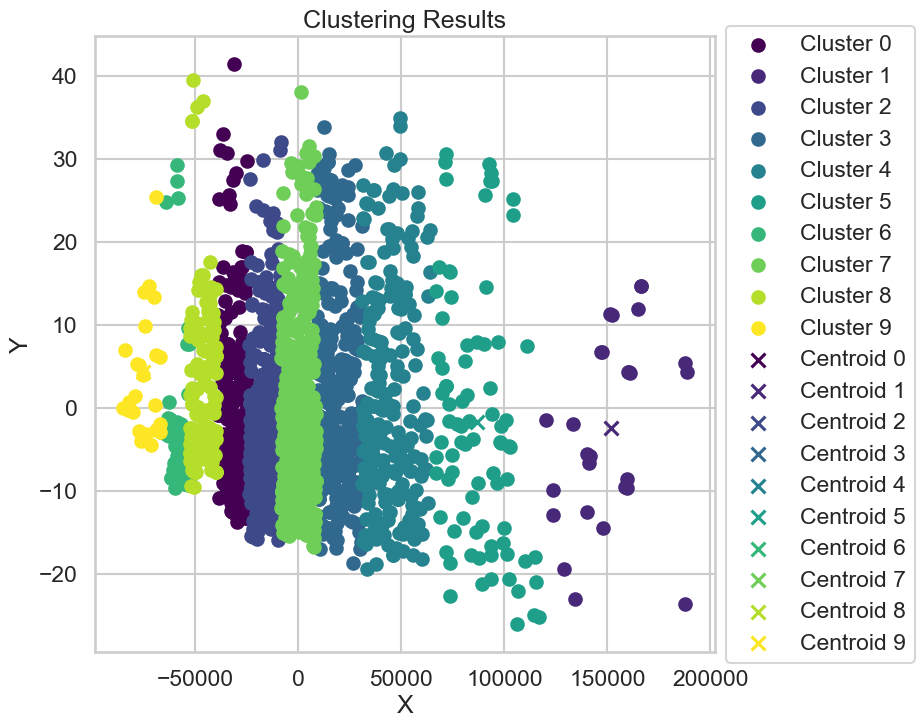

In [99]:
Data_points = reduced_data
num_clusters_range = list(range(2, 11))
cluster_metrics = []
Distance_Type ='Euclidean'
for Number_of_Clusters in num_clusters_range:
    [Final_Cluster_Distance , Cluster_Metric ] = GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type)
    cluster_metrics.append(Cluster_Metric)

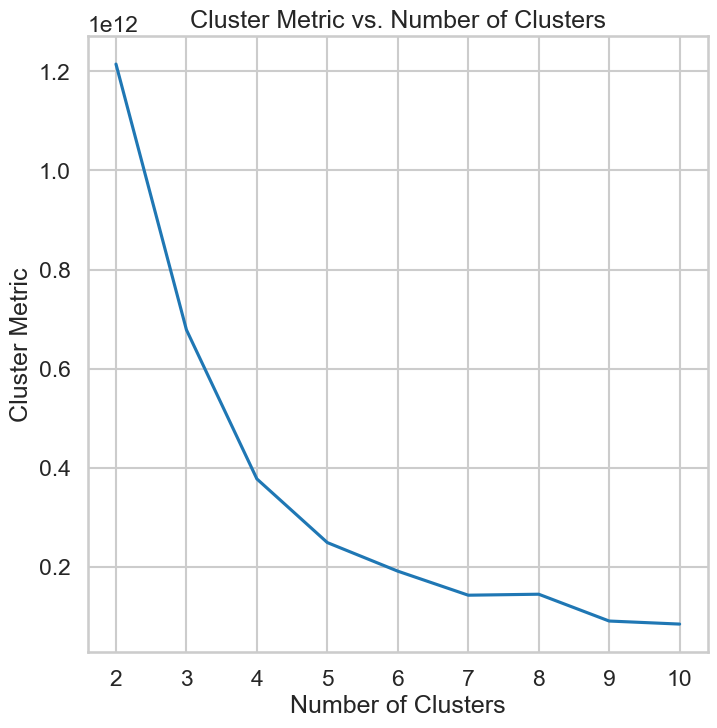

In [100]:
plt.plot(num_clusters_range, cluster_metrics)
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. Number of Clusters')
plt.show()